In [97]:
import numpy as np, pandas as pd
import json, pickle
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

#import py modules:
import PES_data_processor as pdata, PES_models as pmodel

## ansatz vs CHIPR on OH$^+$ data

In [49]:
list_data = np.load('data/hxoy_data.npy', allow_pickle=True) #reload
list_data = list_data[()]

In [3]:
mol = "OH+"
qidxes = pdata.query_one_var_indices(mol, "mol", list_data)

In [43]:
#display the table result:


'''
data = pd.read_pickle("result/performance_22102021.pkl")
display = data[['num_params', 'ansatz_acc', 'chipr_acc','ansatz_t', 'chipr_t', ]]
display
'''
fname0 = "result/performance_22102021.pkl"
#fname = "result/performance_03112021.pkl" #only acc eval
fname = "result/cross_val_performance_OH+_11112021.pkl" #contains time eval
with open(fname0, 'rb') as handle:
    data0 = pickle.load(handle)
with open(fname, 'rb') as handle:
    data = pickle.load(handle)
data["ansatz_0_t"] = data0["ansatz_t"]; data["chipr_t"] = data0["chipr_t"]; data["eval_loop"]=data0["eval_loop"]; data["eval_run"]=data0["eval_run"] #join time eval
filter = ['num_params', 'ansatz_0_acc_test', 'chipr_acc_test', "ansatz_0_t", "chipr_t"] #joined data filter
display = {k:data[k] for k in filter if k in data} #key filter
display = pd.DataFrame(display) #filter the data
display

num_params  ansatz_0_acc_test  chipr_acc_test  ansatz_0_t   chipr_t
0          13           0.000645        0.000349    0.410673  0.456578
1          22           0.000584        0.000294    0.591657  0.784567
2          31           0.000808        0.000114    0.781771  1.118280
3          40           0.000049        0.000151    0.951766  1.416891
4          49           0.000854        0.000322    1.134819  1.742435
5          58           0.000991        0.000400    1.316050  2.063720
6          67           0.000603        0.000418    1.505820  2.398215
7          76           0.001165        0.000242    1.688335  2.716334
8          85           0.000726        0.000316    1.872056  3.033693

In [45]:
print(data["degree"])

[4, 7, 10, 13, 16, 19, 22, 25, 28]


In [51]:
fname = "result/spec_split_data_fit_multirestart_OH+_161121_211534.pkl" #contains ansatz2 acc
with open(fname, 'rb') as handle:
    data1 = pickle.load(handle)
print(data1.keys())

fname = "result/time_eval_ansatz2_161121_120256.pkl" #contains ansatz2 time
with open(fname, 'rb') as handle:
    data2 = pickle.load(handle)
print(data2.keys())

dict_keys(['method', 'test_size', 'num_params', 'opt_restart', 'opt_power', 'opt_delta', 'ansatz_2_acc_train', 'ansatz_2_acc_test', 'ansatz_2_C', 'degree', 'simulation_time'])
dict_keys(['F_name', 'num_params', 'degree', 'times'])


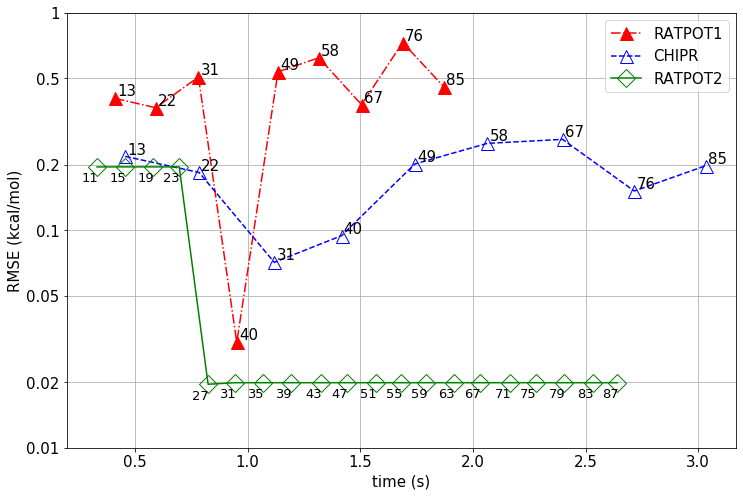

==== Optimization stats ====
optimization restarts =  10
optimization power =  3
delta threshold =  1e-05
evaluation loops =  10000
evaluation runs =  20
elapsed time =  15895.41940832138 s


In [52]:
## plot of the table (finding which model is the best)
plt.rcParams.update({'font.size': 15})
#plt.subplots(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))

markersize = 13

numparams = [str(param) for param in data["num_params"]]
x = data["ansatz_0_t"]; y = np.log10(np.array(data["ansatz_0_acc_test"])*627.5) #scale y to kcal/mol
ax.plot(x, y, '-.r^', markersize=markersize) #ansatz1
for i, xy in enumerate(np.array(list(zip(x, y)))):
    ax.annotate(numparams[i], xy=xy+0.01, textcoords='data')
x = data["chipr_t"]; y = np.log10(np.array(data["chipr_acc_test"])*627.5)
ax.plot(x, y, '--b^', markersize=markersize, fillstyle="none") #chipr
for i, xy in enumerate(np.array(list(zip(x, y)))):
    ax.annotate(numparams[i], xy=xy+0.01, textcoords='data')
x = data2["times"]; y = np.log10(np.array(data1["ansatz_2_acc_test"])*627.5)
numparams = [str(param) for param in data2["num_params"]]
ax.plot(x, y, '-gD', markersize=markersize, fillstyle="none") #ansatz2
for i, xy in enumerate(np.array(list(zip(x, y)))):
    ax.annotate(numparams[i], xy=xy-0.07, textcoords='data', size=13)

interval = [1, 5e-1, 2e-1, 1e-1, 5e-2, 2e-2, 1e-2]
plt.yticks(np.log10(interval), interval)

plt.xlabel("time (s)"); plt.ylabel("RMSE (kcal/mol)")
plt.legend(["RATPOT1", "CHIPR", "RATPOT2"])

ax.grid()
plt.show()
print("==== Optimization stats ====")
#print("data: ", list_data[qidxes[0]]["mol"], list_data[qidxes[0]]["state"], list_data[qidxes[0]]["author"], len(R),"data points")
print("optimization restarts = ",data["opt_restart"])
print("optimization power = ", data["opt_power"])
print("delta threshold = ", data["opt_delta"])
print("evaluation loops = ",data["eval_loop"][0])
print("evaluation runs = ",data["eval_run"][0])
print("elapsed time = ", data["simulation_time"], "s")

### Acc only

dict_keys(['method', 'test_size', 'num_params', 'opt_restart', 'opt_power', 'opt_delta', 'ansatz_2_acc_train', 'ansatz_2_acc_test', 'ansatz_2_C', 'degree', 'simulation_time'])


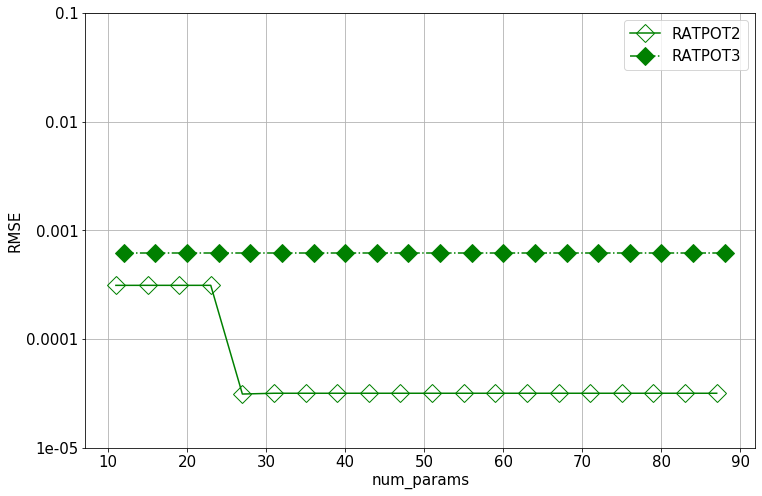

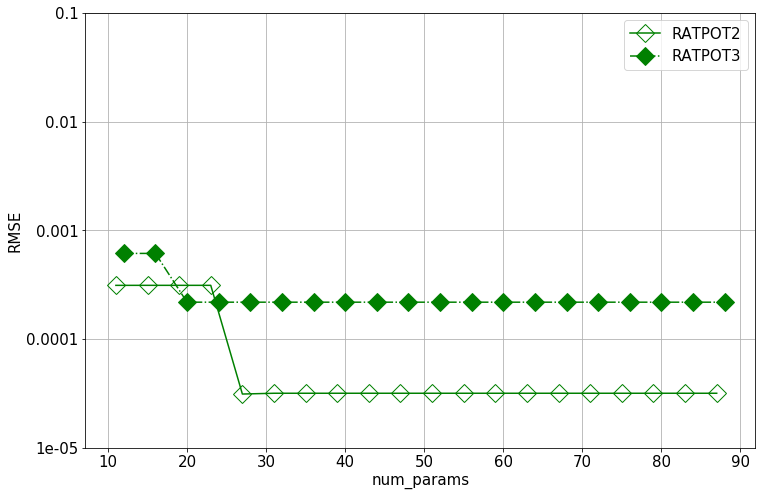

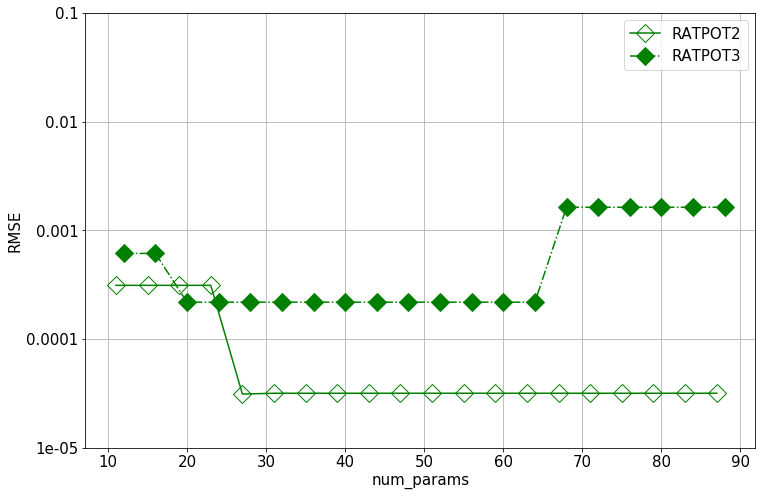

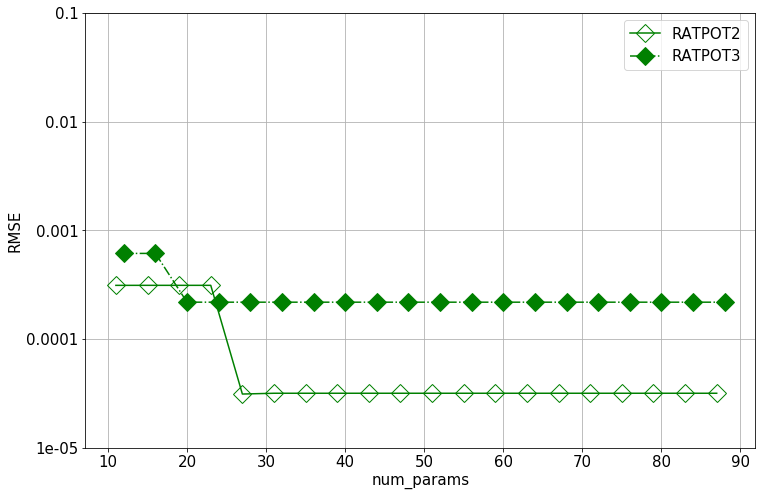

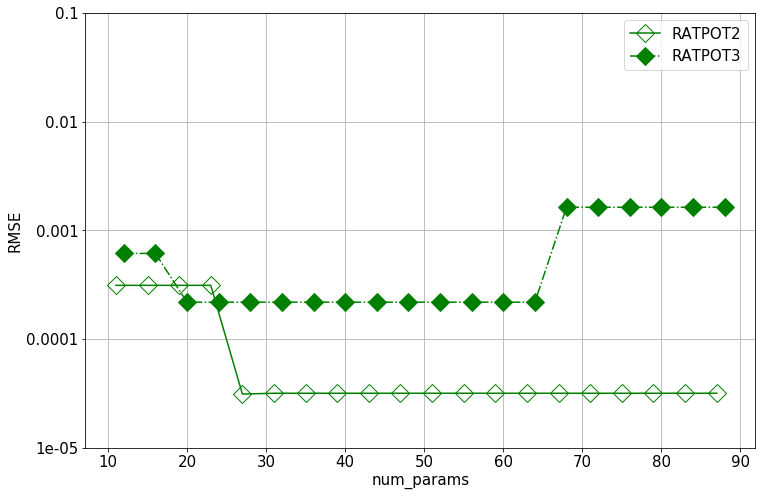

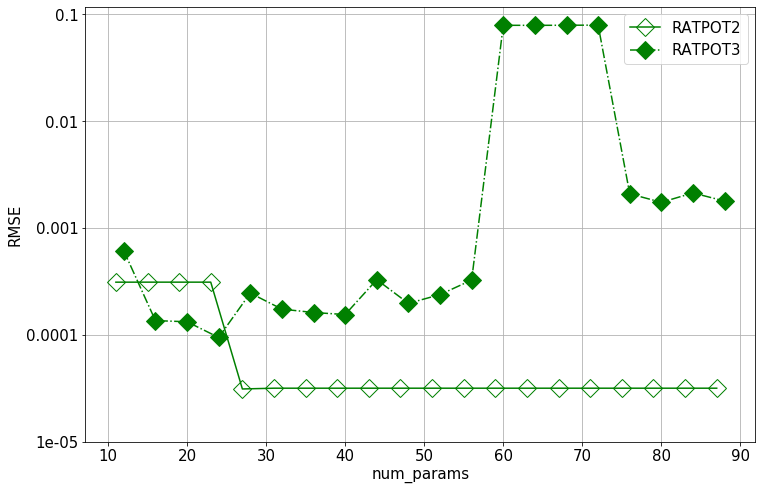

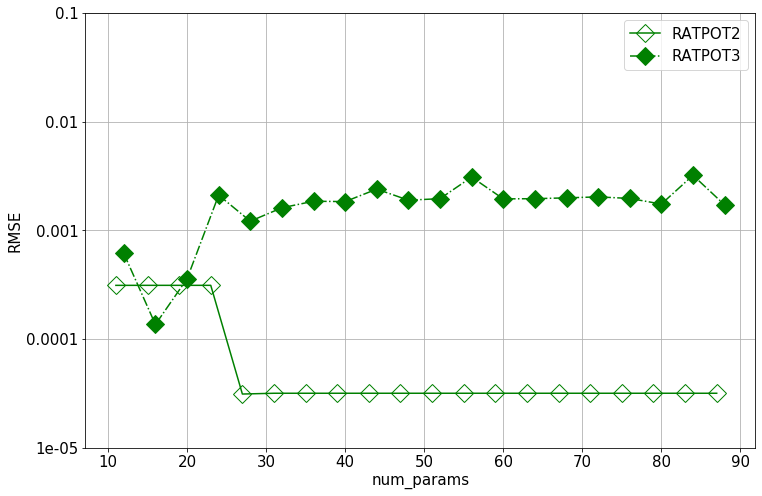

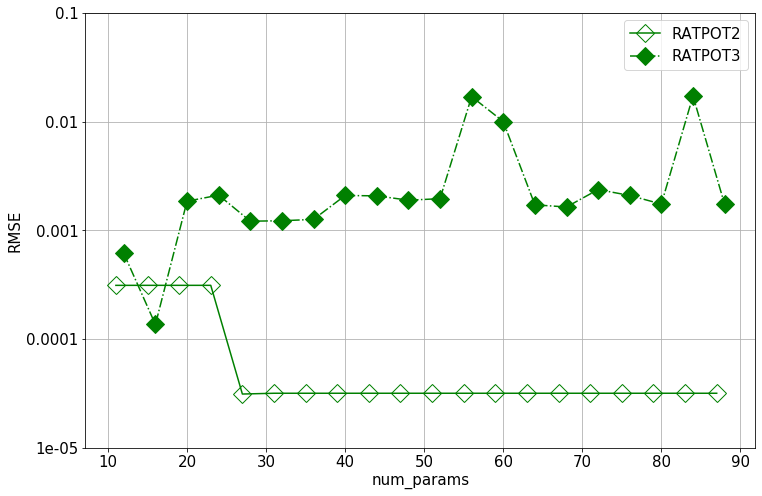

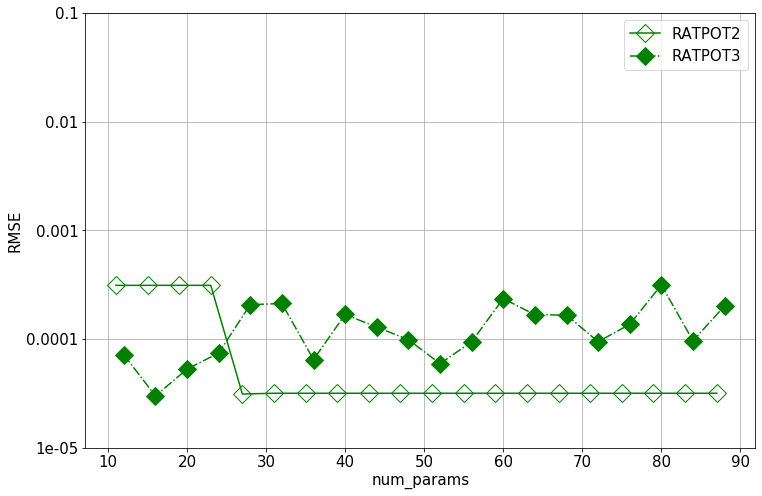

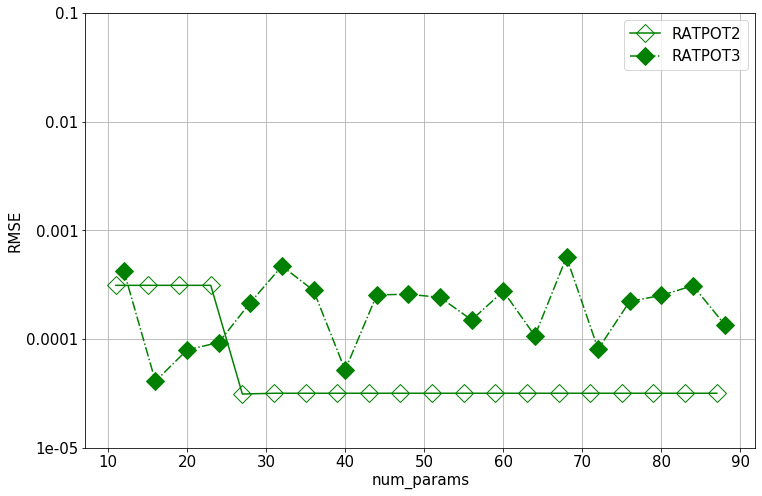

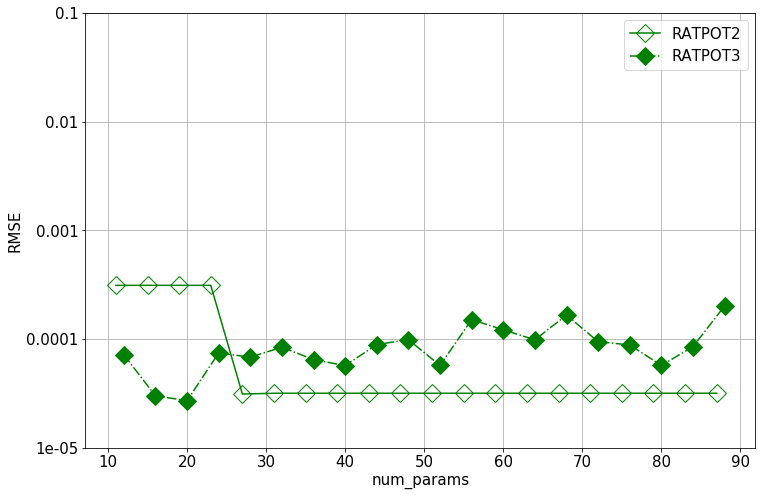

In [25]:
fname = "result/spec_split_data_fit_multirestart_OH+_161121_211534.pkl"
with open(fname, 'rb') as handle:
    data = pickle.load(handle)
print(data.keys())
fnames1 = ["result/spec_split_data_fit_multirestart_ansatz_3_freeze_OH+_241121_173555.pkl",
         "result/spec_split_data_fit_multirestart_ansatz_3_normal_OH+_241121_184742.pkl",
         "result/spec_split_data_fit_multirestart_ansatz_3_normal_OH+_021221_135207.pkl",
         "result/spec_split_data_fit_multirestart_ansatz_3_normal_OH+_021221_145337.pkl",
         "result/spec_split_data_fit_multirestart_ansatz_3_normal_OH+_021221_153841.pkl",
         "result/spec_split_data_fit_multirestart_ansatz_3_normal_OH+_021221_194941.pkl",
         "result/spec_split_data_fit_multirestart_ansatz_3_normal_OH+_031221_122337.pkl",
         "result/spec_split_data_fit_multirestart_ansatz_3_normal_OH+_031221_131728.pkl",
          "result/spec_split_data_fit_multirestart_ansatz_3_OH+_091221_163849.pkl",
          "result/spec_split_data_fit_multirestart_ansatz_3_OH+_091221_193715.pkl",
          "result/spec_split_data_fit_multirestart_ansatz_3_OH+_091221_221601.pkl"]

for fname1 in fnames1:
    with open(fname1, 'rb') as handle:
        data1 = pickle.load(handle)
    #print(data1.keys())

    plt.rcParams.update({'font.size': 15})
    #plt.subplots(figsize=(12, 8))
    fig, ax = plt.subplots(figsize=(12, 8))
    markersize = 13

    x = data["num_params"]; y = data["ansatz_2_acc_test"]
    ax.plot(x, np.log10(y), '-gD', markersize=markersize, fillstyle="none")
    x = data1["num_params"]; y = data1["ansatz_3_acc_test"]
    ax.plot(x, np.log10(y), '-.gD', markersize=markersize)

    interval = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    plt.yticks(np.log10(interval), interval)

    plt.xlabel("num_params"); plt.ylabel("RMSE")
    plt.legend(["RATPOT2","RATPOT3"])

    ax.grid()
    plt.show()

## Error plots

### <li>  Joint fit OH$^+$, ansatz vs CHIPR

In [73]:
#Query the data:
mol = "OH+"
qidxes = pdata.query_one_var_indices(mol, "mol", list_data)

#join the R and V:
R_list = []; V_list = []
for i in qidxes:
    R = list_data[i]["R"]
    V = list_data[i]["V"]
    R_list.append(R); V_list.append(V)

R_list = np.array(R_list); V_list = np.array(V_list)
R = np.concatenate(R_list)
V = np.concatenate(V_list)

C:\Users\beryl\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if sys.path[0] == '':


In [56]:
'''
data = pd.read_pickle("result/res_joint_OH+_271021_153617.pkl")
data = pd.read_pickle("result/res_joint_OH+_291021_160942.pkl")
C_ans = np.array(data["ansatz_C"][0]); C_chipr = np.array(data["chipr_C"][0]); C_dn = np.array(data["dn_C"][0]); C_ds = np.array(data["ds_C"][0]) #adds [0] indexer due to pandas' length trickery
Cs = [C_ans, C_chipr, C_dn, C_ds]
'''
fname = "result/res_joint_OH+_021121_175502.pkl"
with open(fname, 'rb') as handle:
    data = pickle.load(handle)
C_ans = data["ansatz_1_C"]; C_chipr = data["chipr_C"]; 
Cs = [C_ans, C_chipr]

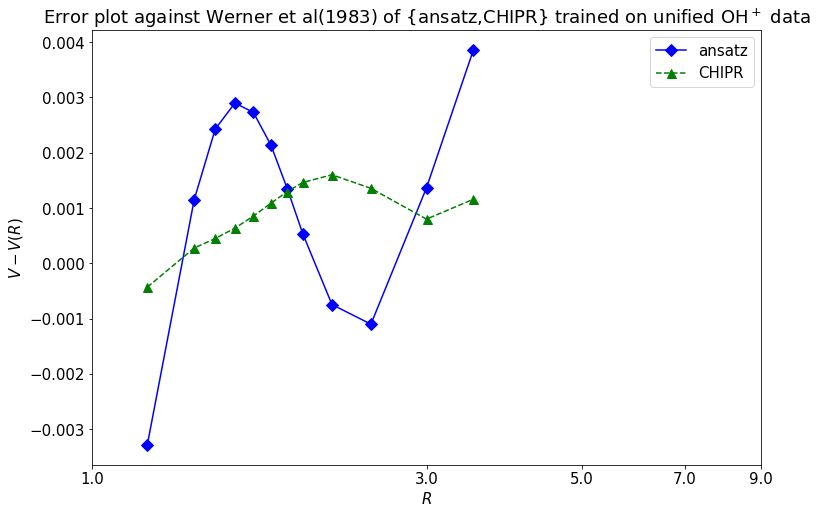

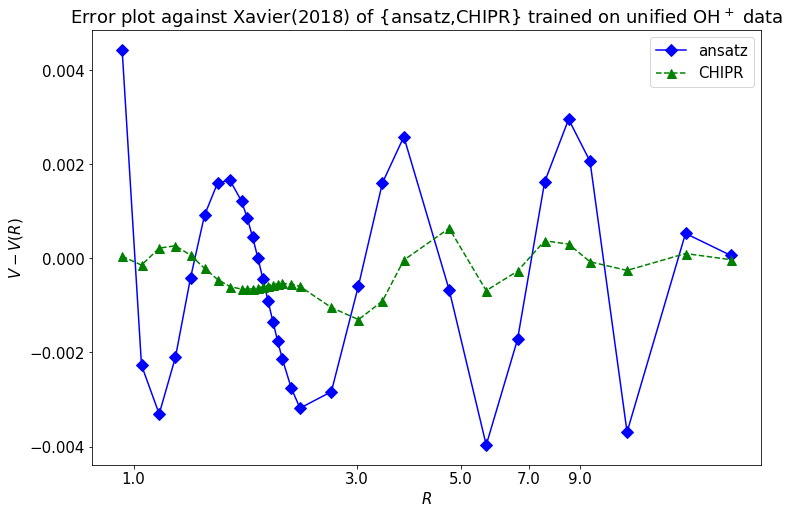

In [57]:
#plot the error on all OH+ data, error of ansatz vs CHIPR:
'''
Fs = [pmodel.f_diatomic_vdw, pmodel.f_diatomic_chipr_ohplus, pmodel.f_diatomic_dn, pmodel.f_diatomic_ds]
M = int((len(C_ans)-1)/3)
m = int((2*M - 2)/3)
'''
Fs = [pmodel.f_diatomic_ansatz_1, pmodel.f_diatomic_chipr_ohplus]
Z = 8 #for OH+
M = int(len(C_ans)/4)
m = M - 1
shapes = ["-bD","--g^", "-.rs", "-rP"]; markersize=9
for i in range(len(V_list)):
    plt.subplots(figsize=(12, 8))
    #args = [(R_list[i],Z,M), (R_list[i],Z,M,m), (R_list[i],), (R_list[i],)]
    args = [(R_list[i],Z,M), (R_list[i],Z,M,m)]
    for j in range(len(Fs)):
        f = Fs[j]
        C = Cs[j]
        V_pred = f(C, *args[j])
        err = V_pred - V_list[i]
        plt.plot(np.log10(R_list[i]), err, shapes[j], markersize=markersize)
    ticks = np.linspace(1, 9, 5) #5 ticks between 1-9 Angstrom
    plt.xticks(np.log10(ticks), ticks)
    data = list_data[qidxes[i]]
    #legends = ["ansatz", "CHIPR", "Deiters-Neumaier", "Deiters-Sadus"]
    legends = ["ansatz", "CHIPR"]
    plt.xlabel("$R$")
    plt.ylabel("$V-V(R)$")
    plt.legend(legends)
    plt.title("Error plot against "+str(list_data[qidxes[i]]["author"])+" of {ansatz,CHIPR} trained on unified OH$^+$ data" )

### <li> Joint Fit, solo functional form (only ansatz)

In [62]:
# load result:
fname = "result/res_joint_solo_OH+_021121_185141.pkl"
with open(fname, 'rb') as handle:
    data = pickle.load(handle)

#### RMSE Plot:

Text(0.5, 1.0, 'RMSE of ansatz_1 on union data of OH+')

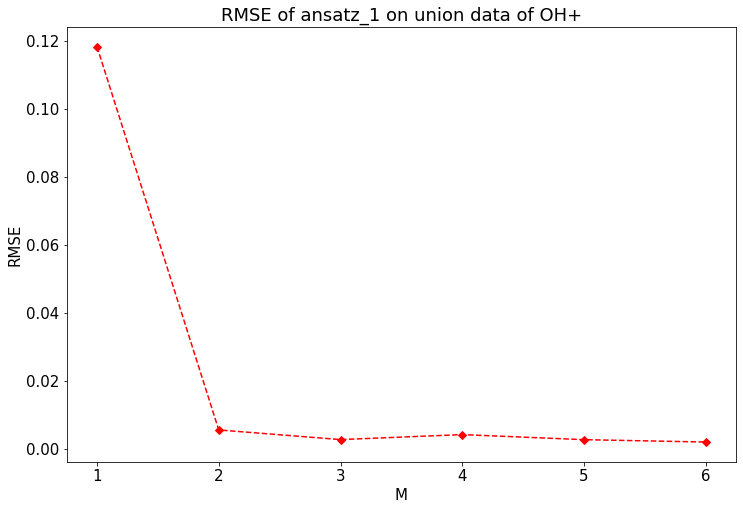

In [72]:
plt.subplots(figsize=(12, 8))
plt.plot(data["degree"], data["ansatz_1_acc"], "--rD")
plt.xlabel("M"); plt.ylabel("RMSE")
plt.title("RMSE of ansatz_1 on union data of "+mol)

#### Error plots:

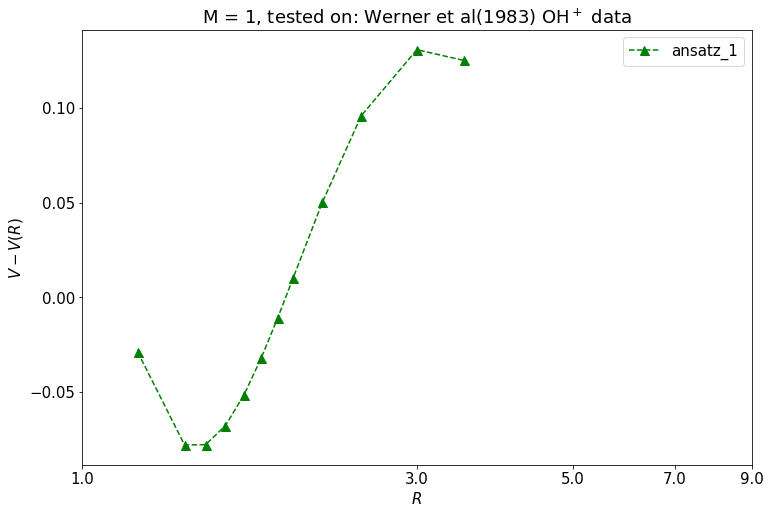

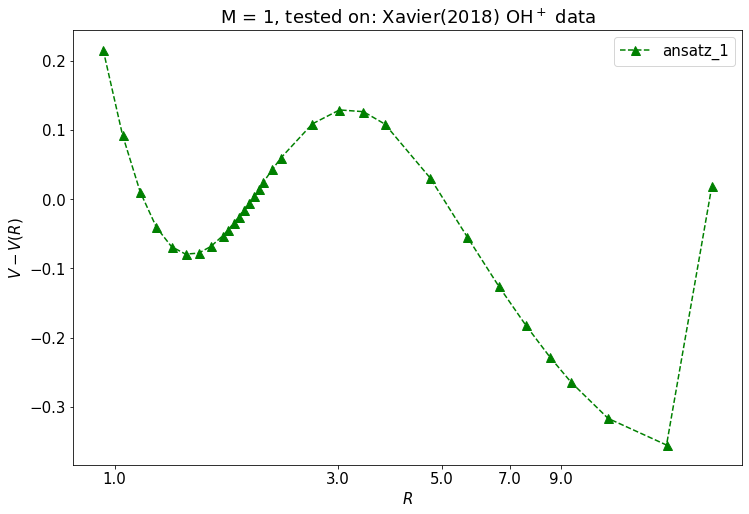

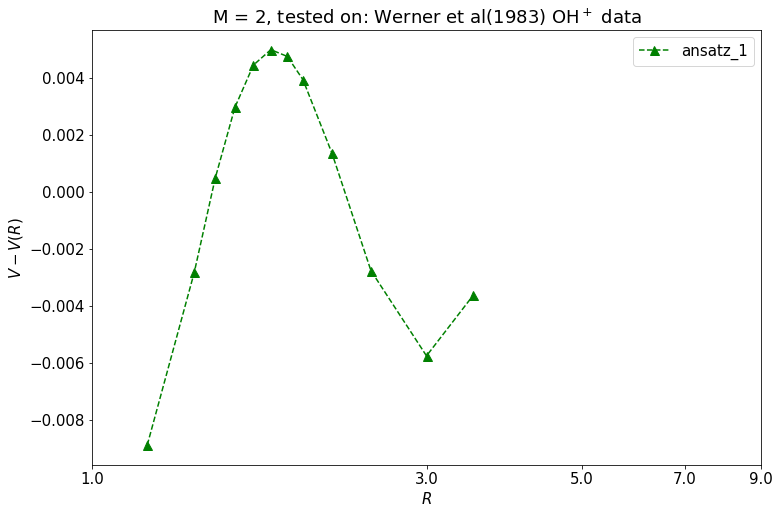

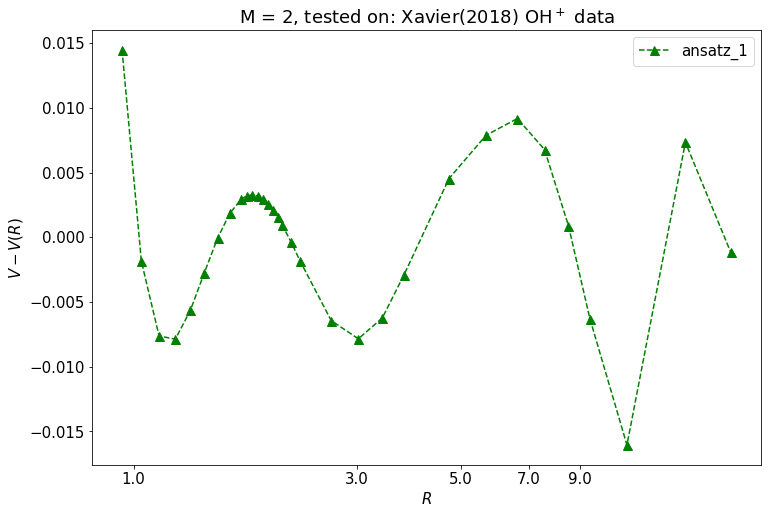

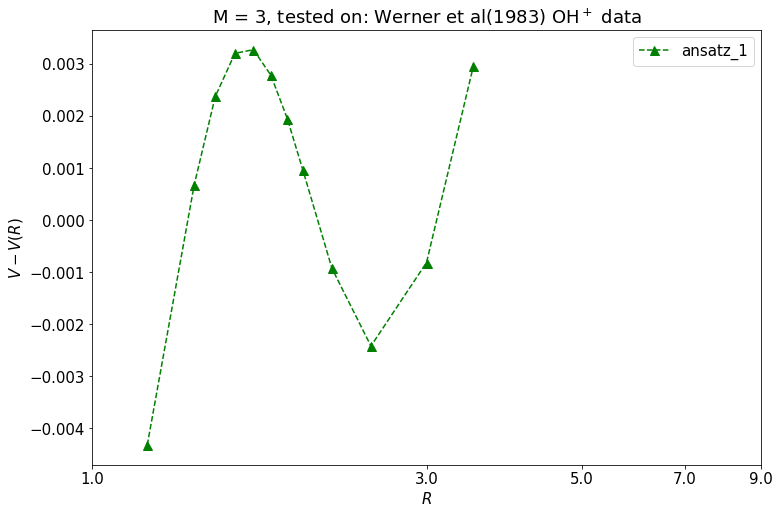

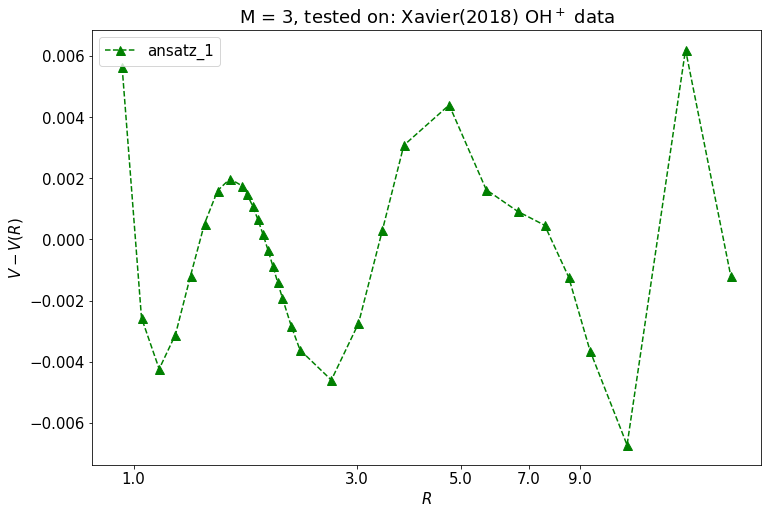

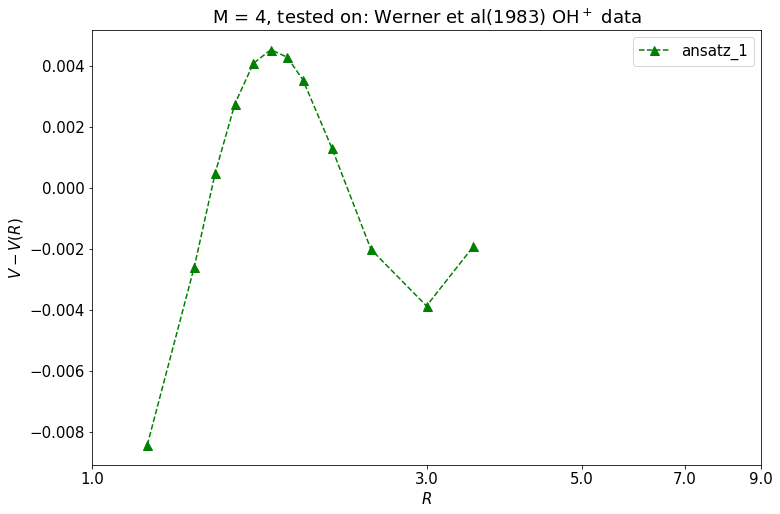

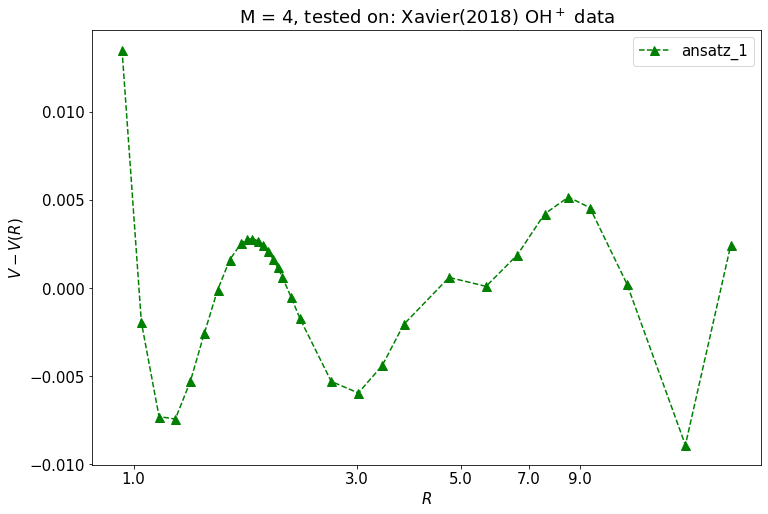

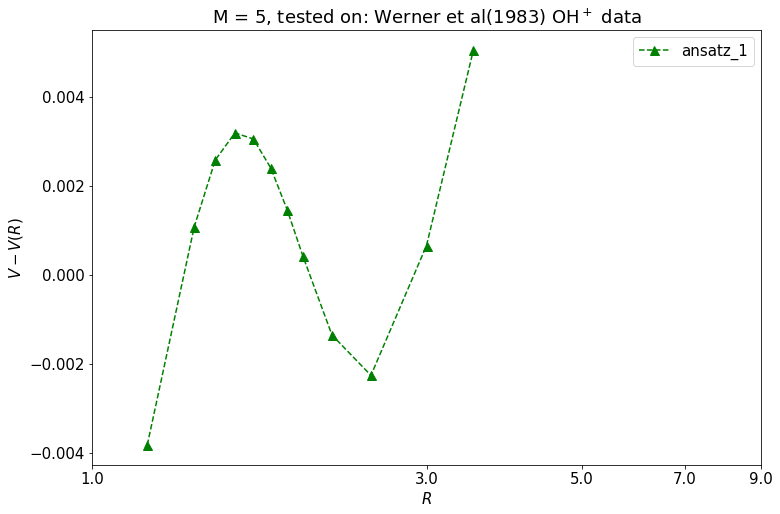

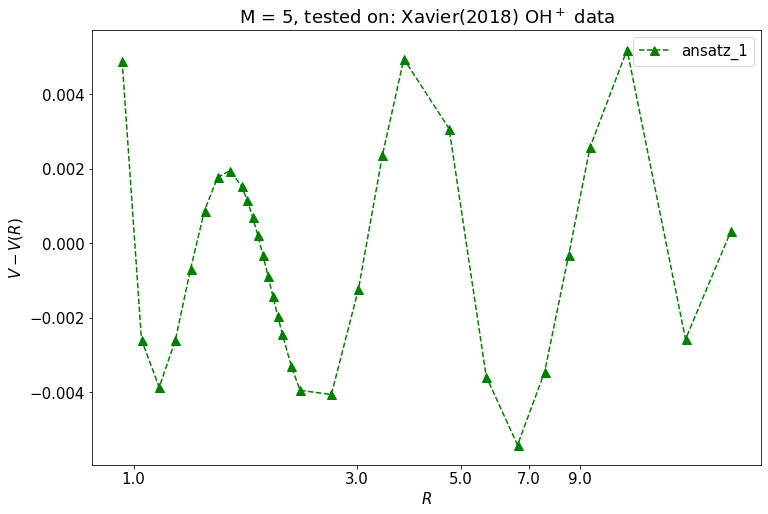

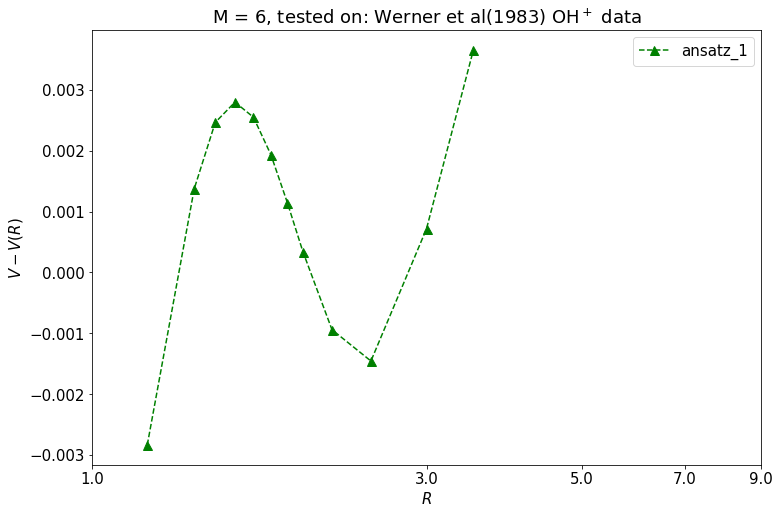

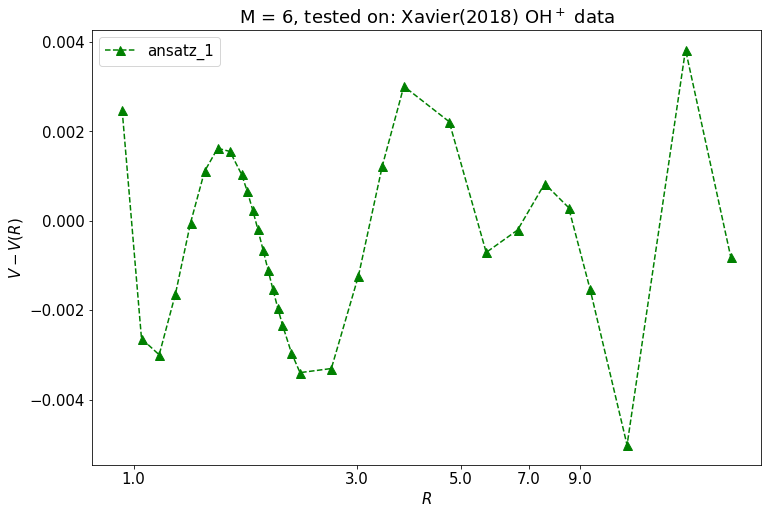

In [76]:
F = pmodel.f_diatomic_ansatz_1
Z = 8 #for OH+
shapes = ["-bD","--g^", "-.rs", "-rP"]; markersize=9
for k, M in enumerate(data["degree"]):
    for i in range(len(V_list)):
        plt.subplots(figsize=(12, 8))
        #args = [(R_list[i],Z,M), (R_list[i],Z,M,m), (R_list[i],), (R_list[i],)]
        arg = (R_list[i],Z,M)
        C = data["ansatz_1_C"][k]
        V_pred = F(C, *arg)
        err = V_pred - V_list[i]
        plt.plot(np.log10(R_list[i]), err, shapes[j], markersize=markersize)
        ticks = np.linspace(1, 9, 5) #5 ticks between 1-9 Angstrom
        plt.xticks(np.log10(ticks), ticks)
        #legends = ["ansatz", "CHIPR", "Deiters-Neumaier", "Deiters-Sadus"]
        legends = ["ansatz_1"]
        plt.xlabel("$R$")
        plt.ylabel("$V-V(R)$")
        plt.legend(legends)
        plt.title("M = "+str(M)+", tested on: "+str(list_data[qidxes[i]]["author"])+" OH$^+$ data")

### Coeff, dataset, and program example

In [36]:
fname = "result/spec_split_data_fit_multirestart_OH+_161121_211534.pkl"
with open(fname, 'rb') as handle:
    data = pickle.load(handle)
print(data.keys())

fname1 = "result/split_data_fit_OH+171121_121942.pkl"
with open(fname1, 'rb') as handle:
    data1 = pickle.load(handle)
print(data1.keys())


fname2 = "result/spec_split_data_fit_multirestart_ansatz_3_freeze_OH+_241121_173555.pkl"
with open(fname2, 'rb') as handle:
    data2 = pickle.load(handle)
print(data2.keys())

#fname3 = "result/spec_split_data_fit_multirestart_ansatz_3_normal_OH+_241121_184742.pkl"
fname3 = "result/spec_split_data_fit_multirestart_ansatz_3_normal_OH+_021221_194941.pkl"
with open(fname3, 'rb') as handle:
    data3 = pickle.load(handle)
print(data3.keys())

print(data["num_params"], data1["num_params"], data2["num_params"], data3["num_params"])
print(data["ansatz_2_acc_test"])

idx = 5 #index with best RMSE, manually checked

dict_keys(['method', 'test_size', 'num_params', 'opt_restart', 'opt_power', 'opt_delta', 'ansatz_2_acc_train', 'ansatz_2_acc_test', 'ansatz_2_C', 'degree', 'simulation_time'])
dict_keys(['num_params', 'opt_restart', 'opt_power', 'opt_delta', 'chipr_t', 'chipr_acc_train', 'chipr_acc_test', 'chipr_C', 'ansatz_1_t', 'ansatz_1_acc_train', 'ansatz_1_acc_test', 'ansatz_1_C', 'degree', 'simulation_time'])
dict_keys(['method', 'test_size', 'num_params', 'opt_restart', 'opt_power', 'opt_delta', 'ansatz_3_acc_train', 'ansatz_3_acc_test', 'ansatz_3_C', 'degree', 'simulation_time'])
dict_keys(['method', 'test_size', 'num_params', 'opt_restart', 'opt_power', 'opt_delta', 'ansatz_3_acc_train', 'ansatz_3_acc_test', 'ansatz_3_C', 'degree', 'simulation_time'])
[11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55, 59, 63, 67, 71, 75, 79, 83, 87] [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88] [12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 8

#### R and V data:

In [6]:
list_data = np.load('data/hxoy_data.npy', allow_pickle=True) #reload
list_data = list_data[()]
mol = "OH+"
qidxes = pdata.query_one_var_indices(mol, "mol", list_data) #pick one
R = list_data[qidxes[1]]["R"]; V = list_data[qidxes[1]]["V"]
print("R = ", R)
print("V = ", V)

R =  [ 0.94486299  1.03934929  1.13383559  1.22832189  1.32280819  1.41729449
  1.51178079  1.60626709  1.70075339  1.74799654  1.79523969  1.84248284
  1.88972599  1.93696914  1.98421229  2.03145544  2.07869859  2.17318489
  2.26767119  2.64561638  3.02356158  3.40150678  3.77945198  4.72431497
  5.66917797  6.61404096  7.55890395  8.50376695  9.44862994 11.33835593
 15.11780791 18.89725989]
V =  [1.13576423 0.87267523 0.68914423 0.56098753 0.47182183 0.41039383
 0.36884623 0.34161123 0.32470223 0.31918723 0.31524223 0.31262723
 0.31113823 0.31060023 0.31086423 0.31180123 0.31330223 0.31762823
 0.32323923 0.35120723 0.37953023 0.40429143 0.42511133 0.46398523
 0.48699363 0.4963278  0.49909276 0.49988219 0.50016526 0.500293
 0.50039399 0.50042037]


In [407]:
# functions for printing
def f_diatomic_ansatz_2_verbose(C, *args):
    '''for printing purpose only'''
    '''rational potential without Z, total of 4M+7 parameters'''
    R = args[0]
    M = args[1] #degree of pol
    
    #coefficients:
    a = C[: M]
    b = C[M : 2*M]
    c = C[2*M : 3*M+4]
    d = C[3*M+4 : 4*M+7]
    
    print("a =")
    print(np.array2string(a, separator=", "))
    print("b =")
    print(np.array2string(b, separator=", "))
    print("c =")
    print(np.array2string(c[:-1], separator=", "))
    print("d =")
    print(np.array2string(d, separator=", "))
    print("c0 =", c[-1])

def f_diatomic_ansatz_3_verbose(C, *args):
    '''RATPOT3: with coulomb term, total of 4M+8 parameters'''
    R = args[0]
    Z = args[1]
    M = args[2] #degree of pol
    
    #coefficients:
    a = C[: M]
    b = C[M : 2*M]
    c = C[2*M : 3*M+4]
    d = C[3*M+4 : 4*M+7]
    R0 = C[-1] #or C[4M+7]
    
    print("a =")
    print(np.array2string(a, separator=", "))
    print("b =")
    print(np.array2string(b, separator=", "))
    print("c =")
    print(np.array2string(c[:-1], separator=", "))
    print("d =")
    print(np.array2string(d, separator=", "))
    print("R0 = ",R0)
    print("c0 =", c[-1])

#### Best coefficients for each RATPOT2 and RATPOT3 (normal) per M:

In [37]:
print("======== Results sorted by degree (parameters) ========")
for i in range(len(data["degree"])):
    print(">>>> RATPOT2:")
    print("M = ",data["degree"][i], ", parameters = ",data["num_params"][i], ", test RMSE = ", data["ansatz_2_acc_test"][i])
    #print("C = ")
    f_diatomic_ansatz_2_verbose(data["ansatz_2_C"][i], 0, data["degree"][i])
    print(">>>> RATPOT3 (normal):")
    print("M = ",data3["degree"][i], ", parameters = ",data3["num_params"][i], ", test RMSE = ", data3["ansatz_3_acc_test"][i])
    #print("C = ")
    f_diatomic_ansatz_3_verbose(data3["ansatz_3_C"][i], 0, 0, data3["degree"][i])
    print("=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")

======== Results sorted by degree (parameters) ========
>>>> RATPOT2:
M =  1 , parameters =  11 , test RMSE =  0.0003119758866654684
a =
[0.86657759]
b =
[-0.13801881]
c =
[  0.37374507,   4.94246995,   2.10356514, -78.40133293]
d =
[0.        , 0.97896484, 1.8412936 , 0.01039644]
c0 = 0.5006061521163679
>>>> RATPOT3 (normal):
M =  1 , parameters =  12 , test RMSE =  0.0006138067237228979
a =
[-15.37631699]
b =
[0.20251439]
c =
[ 4.39230138,  5.35991429, -0.24335661,  1.08363821]
d =
[ 3.75248263, 14.49459206,  0.8401561 ,  0.74942262]
R0 =  1.2877089417973864
c0 = 0.5008886671178344
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
>>>> RATPOT2:
M =  2 , parameters =  15 , test RMSE =  0.00031215238644253244
a =
[ 8.66577448e-01, -2.31510160e-07]
b =
[-0.13801902,  0.        ]
c =
[ 2.28795866e-07,  3.73745361e-01,  4.94246989e+00,  2.10356509e+00,
 -7.84013329e+01]
d =
[0.        , 0.        , 0.97896483, 1.84129355, 0.01039644]
c0 = 0.5006058379325842
>>>> RATPOT3 (normal):
M =  2 , 

In [363]:
fname = "result/spec_split_data_fit_multirestart_ansatz_3_OH+_091221_221601.pkl"
with open(fname, 'rb') as handle:
    data = pickle.load(handle)
print("M = ",data["degree"][2], ", parameters = ",data["num_params"][2], ", test RMSE = ", data["ansatz_3_acc_test"][2])
f_diatomic_ansatz_3_verbose(data["ansatz_3_C"][2], 0, 0, data["degree"][2])

M =  3 , parameters =  20 , test RMSE =  2.7181489567455422e-05
a =
[ 8.42488856, 10.33782352,  8.57410902]
b =
[20.31057675, 20.29881348,  7.81355347]
c =
[ 5.10635682,  5.50098803,  0.92744816, 36.92251441,  2.13326493,
  8.55463054]
d =
[ 6.29055604, 38.48359653,  0.28258084, 10.55839258,  0.96718594,
  7.78788326]
R0 =  1.288657795471638
c0 = 0.5003497391659774


#### The used functions:

In [30]:
import numpy as np # only numpy is required from this cell onwards

def f_diatomic_ansatz_2(C, *args):
    '''rational potential without Z, total of 4M+7 parameters'''
    R = args[0]
    M = args[1] #degree of pol
    
    #coefficients:
    a = C[: M]
    b = C[M : 2*M]
    c = C[2*M : 3*M+4]
    d = C[3*M+4 : 4*M+7]
    
    #evaluates P:
    #the last indexed coefficients are outside of the loop, so less index operations
    P = c[-2]
    for i in range(M): #i=0,1...M-1
        P *= (R - a[i])**2 + b[i]*R
           
    #evaluates Q:
    Q = (R + d[-1])*R
    for i in range(M+2): #i=0,1,..M+1
        Q *= (R - c[i])**2 + d[i]*R
    
    #the rational potential:
    V = c[-1] + (P/Q)
    
    return V
    

def f_diatomic_ansatz_3(C, *args):
    '''RATPOT3: with coulomb term, total of 4M+8 parameters'''
    R = args[0]
    Z = args[1]
    M = args[2] #degree of pol
    
    #coefficients:
    a = C[: M]
    b = C[M : 2*M]
    c = C[2*M : 3*M+4]
    d = C[3*M+4 : 4*M+7]
    R0 = C[-1] #or C[4M+7]
    
    P = Z*(1/R - 1/R0)
    for i in range(M): #0,1,..M-1 (M length)
        P *= (1 - R/a[i])**2 + R/b[i]
    
    Q = 1
    for i in range(M+3): #0,1,..M+2 (M+3 length)
        Q *= (1 - R/c[i])**2 + R/d[i]
    
    V = c[-1] + (P/Q)
    
    return V

# the RMSE, used for example in below cell:
def RMSE(Y_pred, Y):
    error = 0
    n = len(Y)
    for i in range(n):
        diff = (Y[i]-Y_pred[i])**2
        error += diff
    return np.sqrt(error/n)

#### How to use (example):

In [38]:
# RATPOT 2:
M = 5 # or int(len(C)-7/4) for RATPOT2, or int(len(C)-8/4) for RATPOT3
a =[ -6.42323476, -58.44321524,   2.06372155,   0.71313762, -58.46809287]
b =[-46.15176321,   0.        ,   2.66032896,   0.        ,   0.        ]
c =[ -9.34719025, -51.22130786,   0.71105066,   1.4028641 ,   5.43673476, 1.85041744,   3.70499722,   0.60287412]
d =[0.        , 0.        , 0.        , 2.76188628, 0.88253351, 2.12599993, 3.39004171, 0.        ]
c0 = 0.5003549412276892
C = np.hstack((a,b,c,c0,d))
V_pred = f_diatomic_ansatz_2(C, R, M)
print("RMSE (union data) of RATPOT2 = ",RMSE(V_pred, V))

# RATPOT 3:
Z = 8 # for OH+
M =  4 #parameters =  24 , test RMSE =  9.477583860409207e-05
a = [-11.3537841 ,   9.22384407,   0.04279442,  -0.90552986]
b = [ 0.88809723, 18.5173541 ,  1.02847759,  0.71980267]
c = [  3.07693284,  -1.99181625,   5.25671545, -15.87050073,  -0.08523955, -0.79666286,  -0.55960391]
d = [ 1.87188762, 13.52476242, 30.08583315,  5.63918636, 16.83372057, 0.49588317,  0.74805328]
R0 =  1.2885393348587373
c0 = 0.5004749020058908
C = np.hstack((a,b,c,c0,d,R0))
V_pred = f_diatomic_ansatz_3(C, R, Z, M)
print("RMSE (union data) of RATPOT3 = ",RMSE(V_pred, V))

RMSE (union data) of RATPOT2 =  2.804925250286599e-05
RMSE (union data) of RATPOT3 =  9.00502422094885e-05


### <li> Separate fit

In [ ]:
data = pd.read_pickle("result/res_each_state_271021_145320.pkl")
# OH+:
mol = "OH+"
Z = 8 #for OH+
M = int((data["num_params"][0]-1)/3)
m = int((2*M - 2)/3)
#get the C:
length = data.shape[0]
shapes = ["-bD","--g^"]
for i in range(length):
    if data["mol"][i] == mol:
        #plot per mol per state per author:
        qidx = pdata.query_many_vars_indices([mol, data["state"][i], data["author"][i]], ["mol", "state", "author"], list_data)
        R = list_data[qidx[0]]["R"]; V = list_data[qidx[0]]["V"]
        
        #ansatz:
        C = data["ansatz_C"][i]
        V_pred = pmodel.f_diatomic_vdw(C, R, Z, M)
        err_a = V_pred - V

        #chipr:
        C = data["chipr_C"][i]
        V_pred = pmodel.f_diatomic_chipr_ohplus(C, R, Z, M, m)
        err_c = V_pred - V
        
        plt.subplots(figsize=(12, 8))
        plt.plot(np.log10(R), err_a, shapes[0])
        plt.plot(np.log10(R), err_c, shapes[1])
        ticks = np.linspace(1, 9, 5) #5 ticks between 1-9 Angstrom
        plt.xticks(np.log10(ticks), ticks)
        legends = ["ansatz", "CHIPR"]
        plt.xlabel("R")
        plt.ylabel("$V-V(R)$")
        plt.legend(legends)
        plt.title("Error plot, separate fit, "+str(data["mol"][i])+", "+str(data["state"][i])+", "+str(data["author"][i]) )

In [ ]:
# All molecules:
data = pd.read_pickle("result/res_each_state_281021_130049.pkl")
print(data)

C:\Users\beryl\Documents\Coding\Python\pes\PES_models.py:40: RuntimeWarning: divide by zero encountered in true_divide
  inv_exp = 1/exp
C:\Users\beryl\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


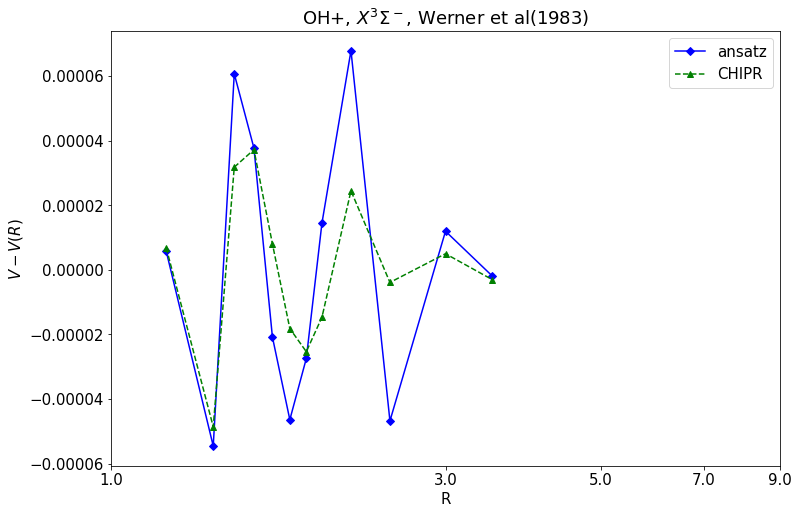

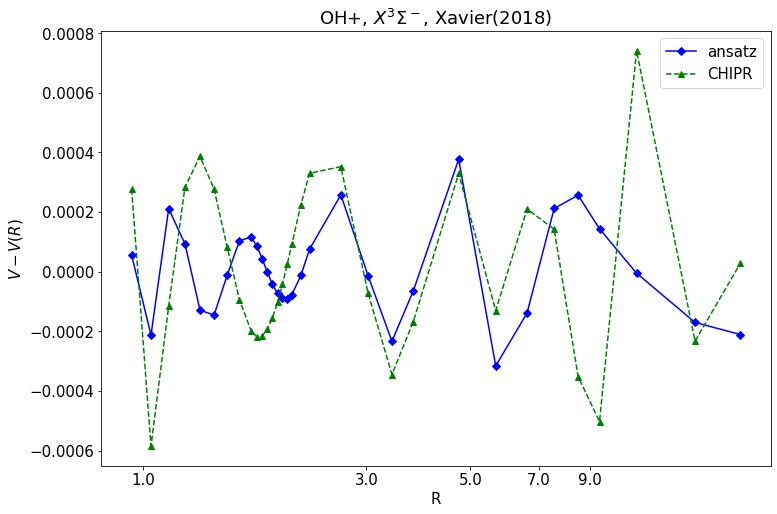

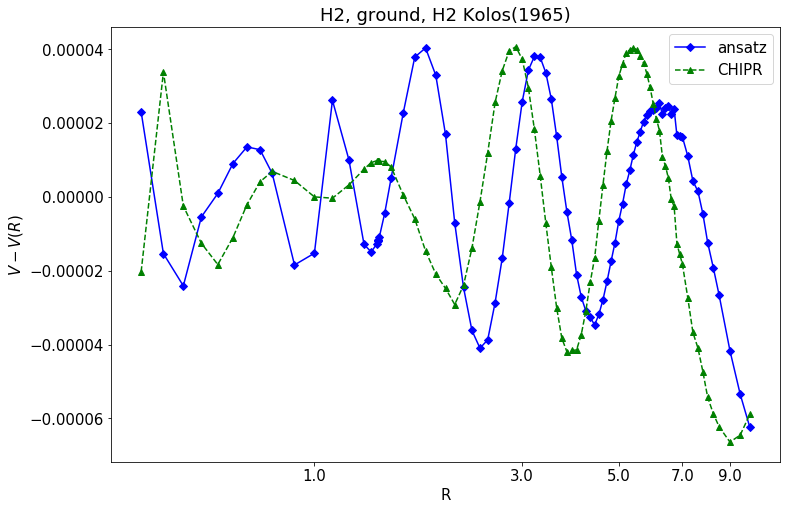

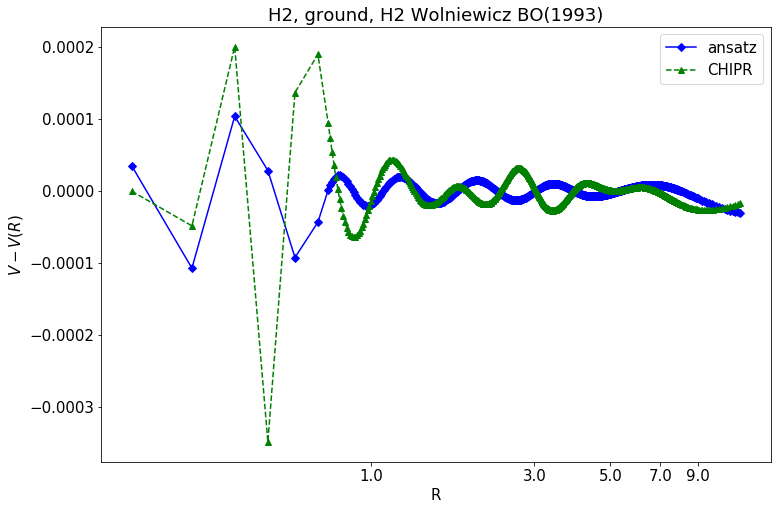

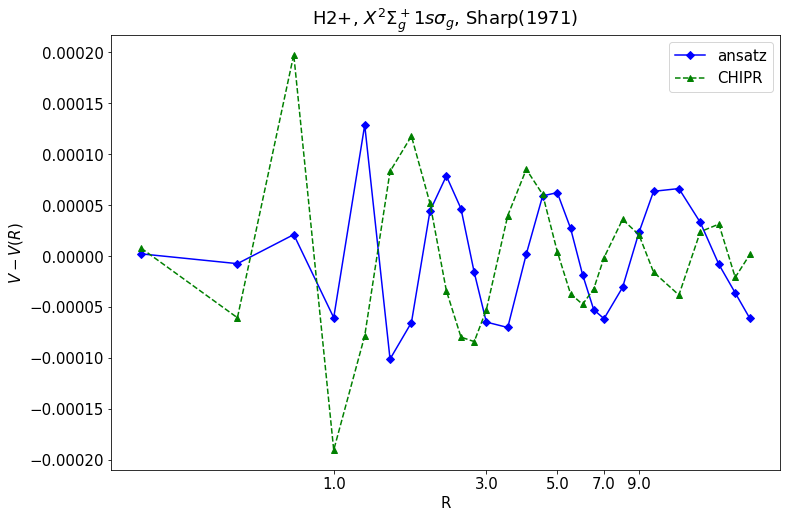

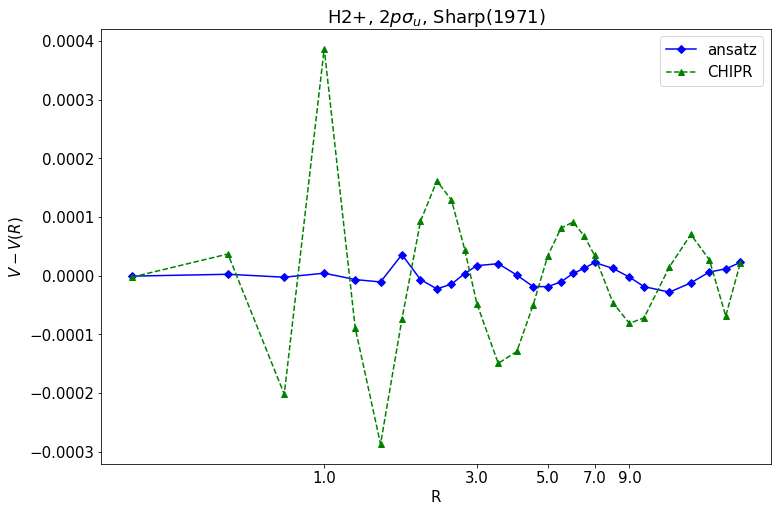

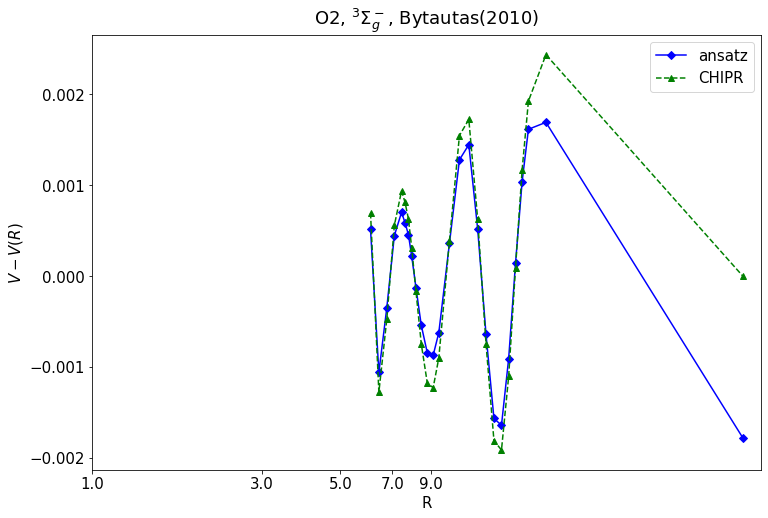

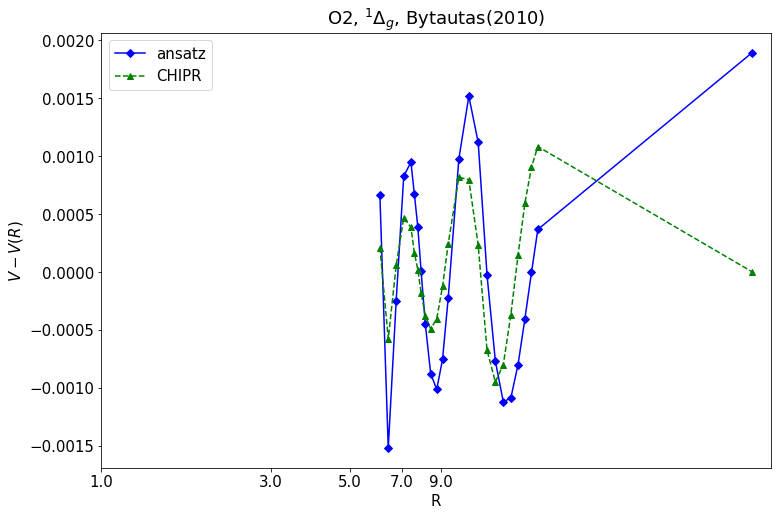

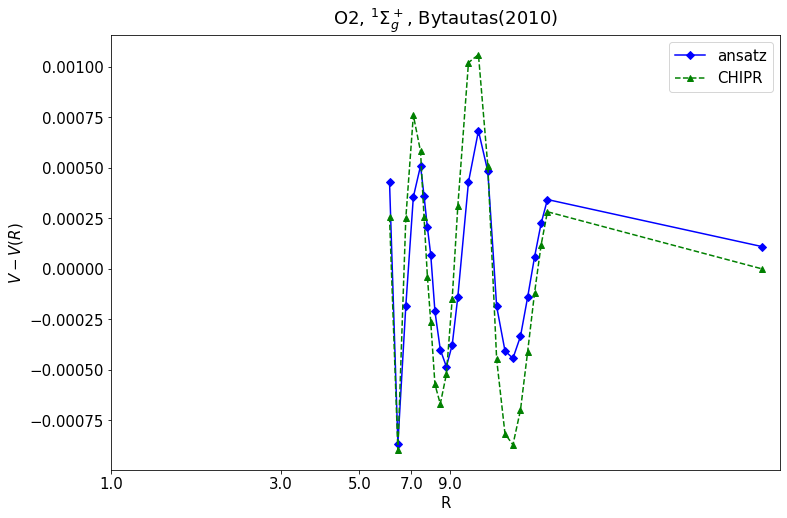

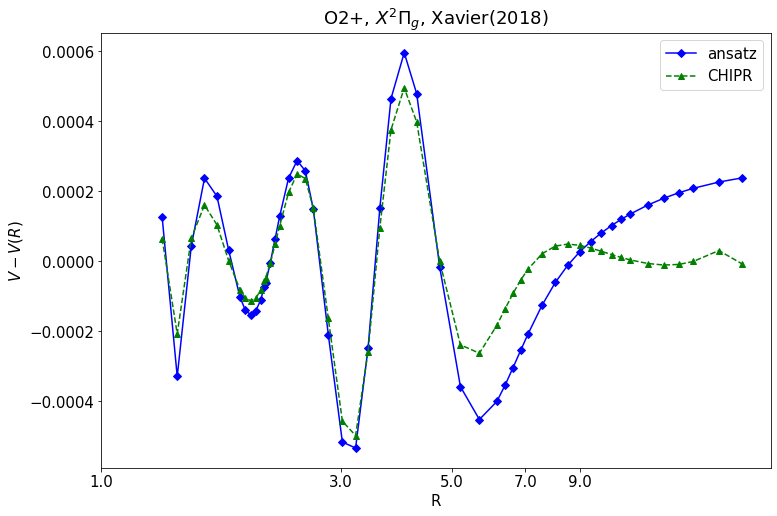

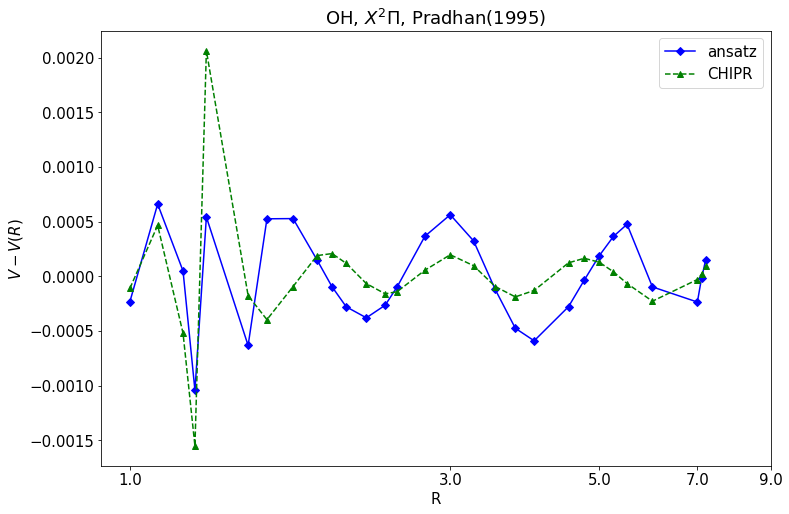

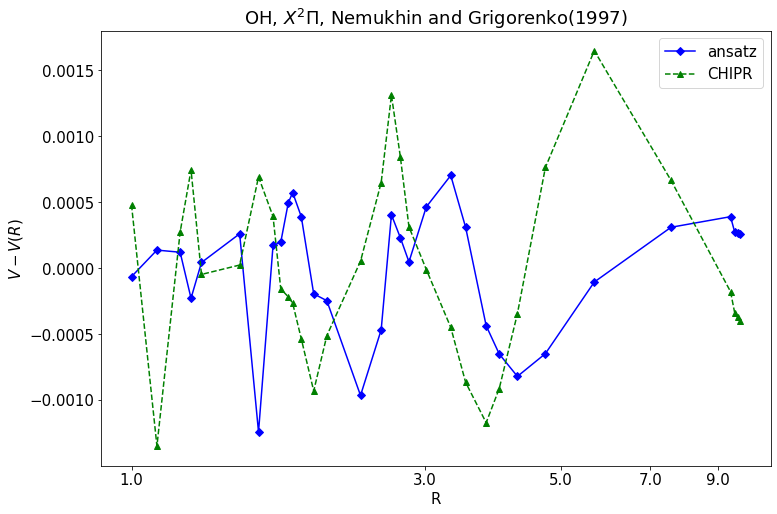

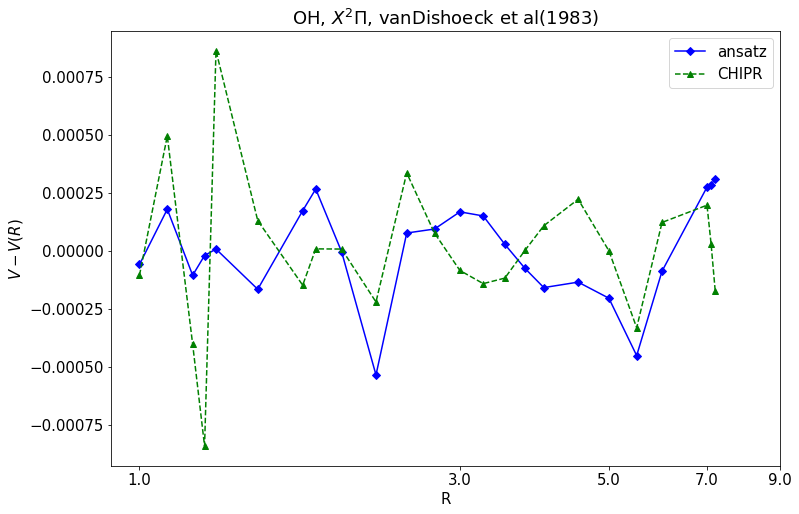

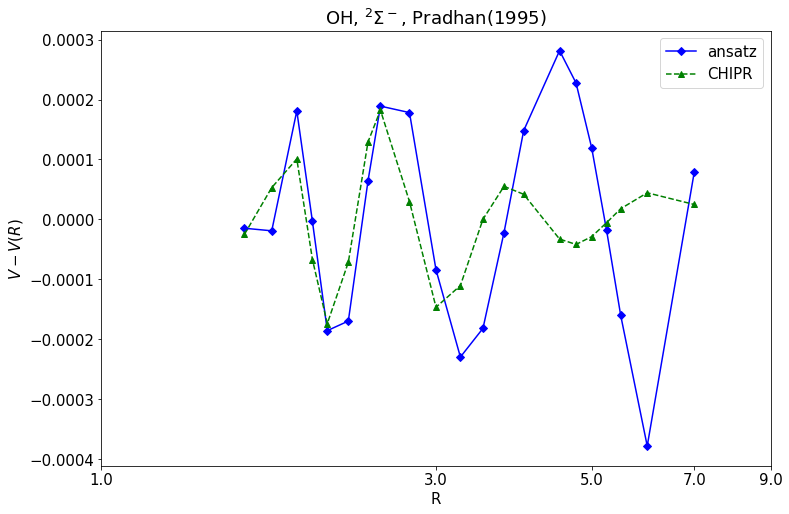

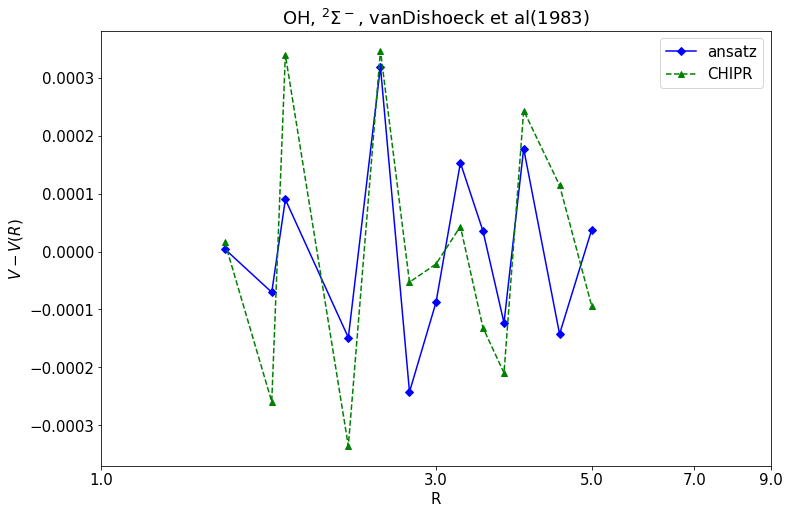

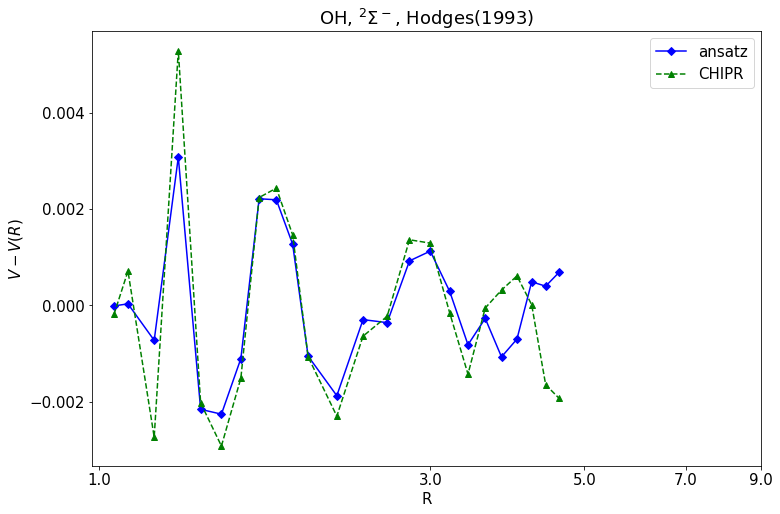

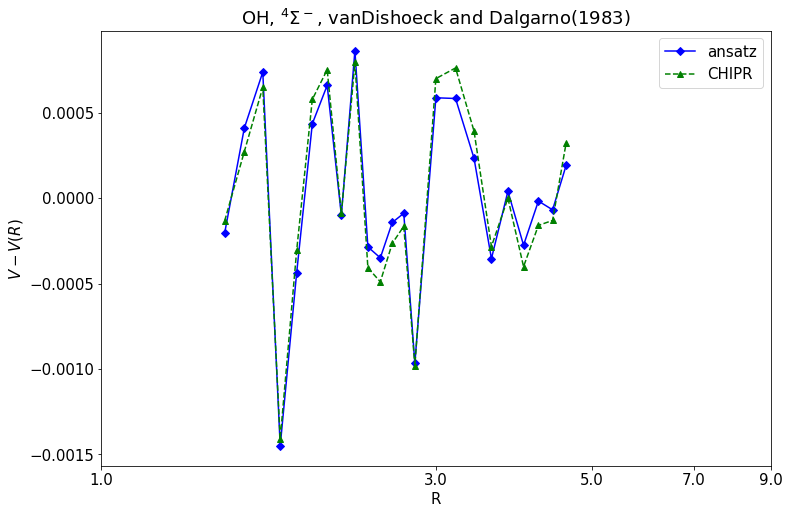

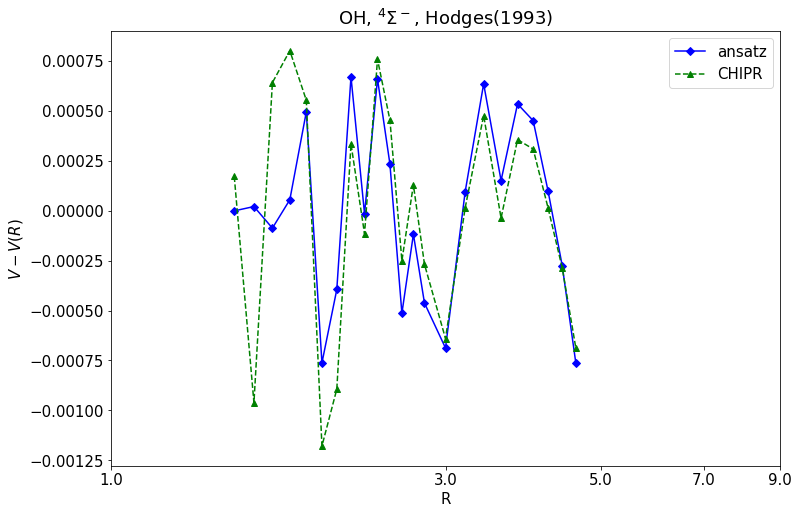

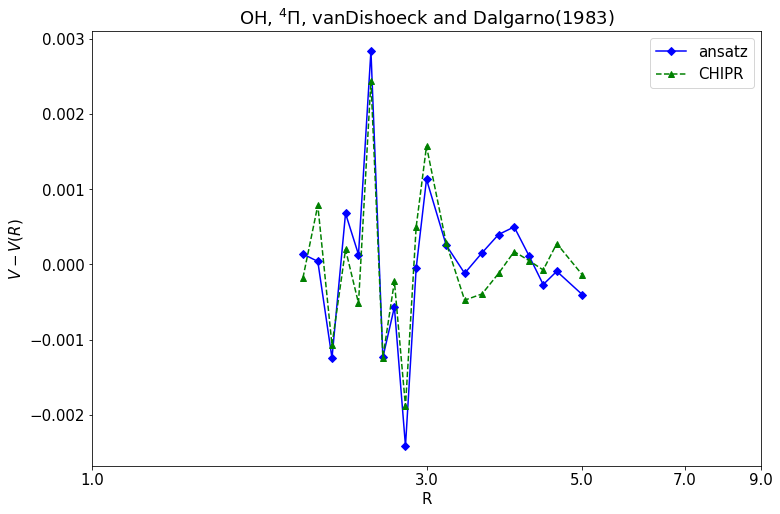

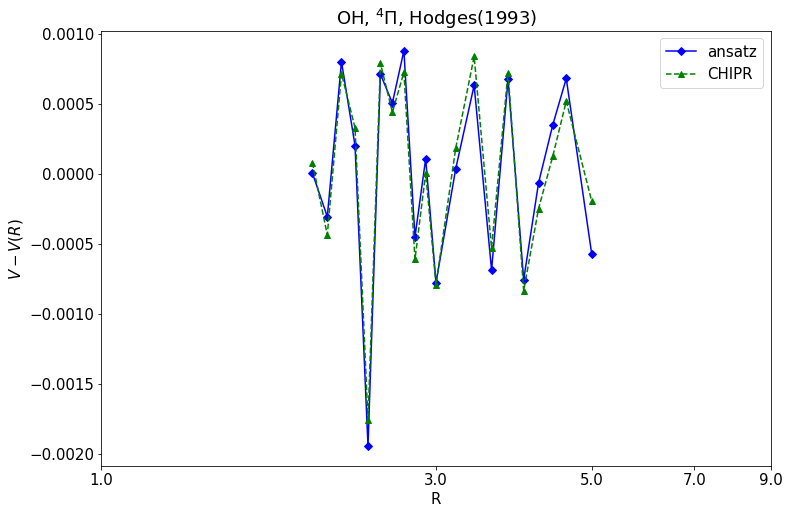

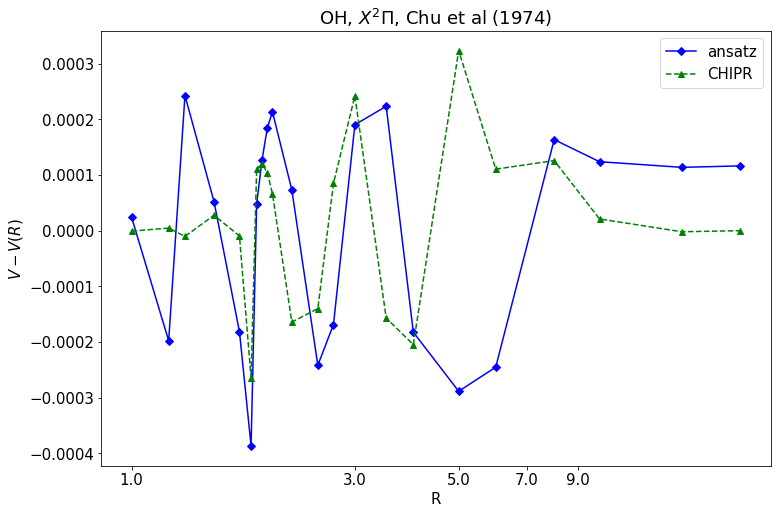

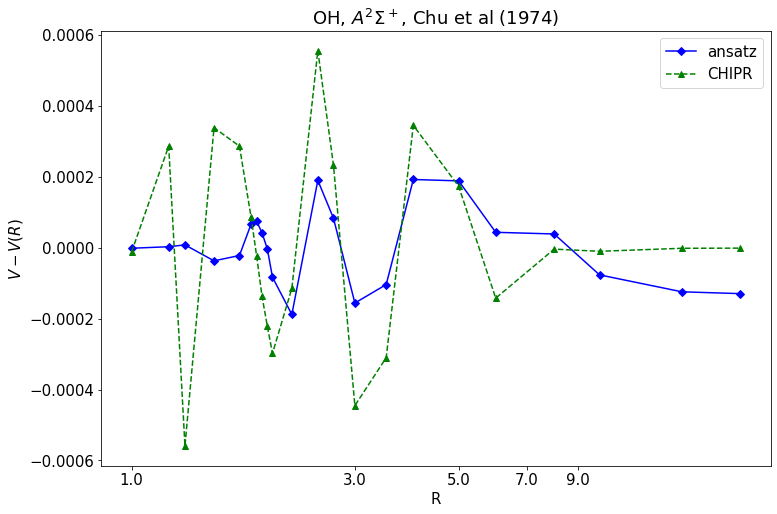

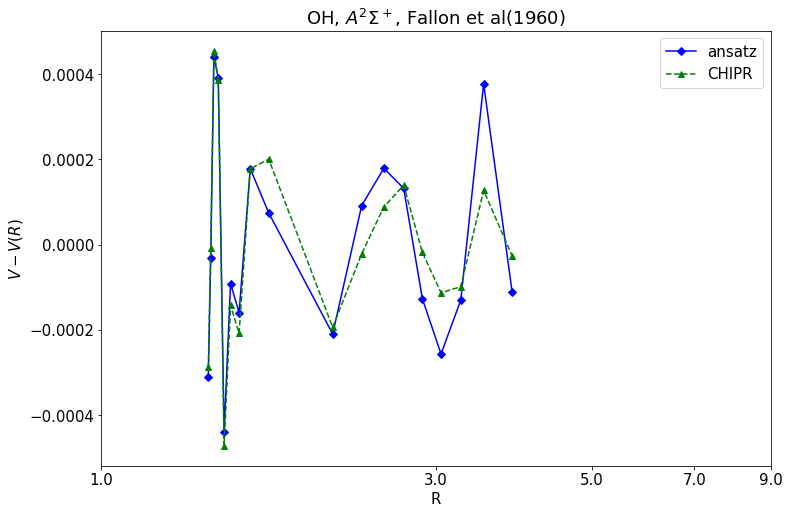

In [83]:
mols = ["OH+", "H2", "H2+", "O2", "O2+", "OH"]
#Zs = {"OH+":8, "H2":1, "H2+":1, "O2":64, "O2+":64, "OH":8}
M = int((data["num_params"][0]-1)/3)
m = int((2*M - 2)/3)
#get the C:
length = data.shape[0]
shapes = ["-bD","--g^"]
for mol in mols:
    for i in range(length):
        if data["mol"][i] == mol:
            #plot per mol per state per author:
            qidx = pdata.query_many_vars_indices([mol, data["state"][i], data["author"][i]], ["mol", "state", "author"], list_data)
            R = list_data[qidx[0]]["R"]; V = list_data[qidx[0]]["V"]; Z = data["Z"][i]

            #ansatz:
            C = data["ansatz_C"][i]
            V_pred = pmodel.f_diatomic_vdw(C, R, Z, M)
            err_a = V_pred - V

            #chipr:
            C = data["chipr_C"][i]
            V_pred = pmodel.f_diatomic_chipr_ohplus(C, R, Z, M, m)
            err_c = V_pred - V

            plt.subplots(figsize=(12, 8))
            plt.plot(np.log10(R), err_a, shapes[0])
            plt.plot(np.log10(R), err_c, shapes[1])
            ticks = np.linspace(1, 9, 5) #5 ticks between 1-9 Angstrom
            plt.xticks(np.log10(ticks), ticks)
            legends = ["ansatz", "CHIPR"]
            plt.xlabel("R")
            plt.ylabel("$V-V(R)$")
            plt.legend(legends)
            plt.title(str(data["mol"][i])+", "+str(data["state"][i])+", "+str(data["author"][i]) )

### All states fit

In [37]:
fname = "result/cross_val_each_state_121121_001441.pkl" #contains time eval
with open(fname, 'rb') as handle:
    data = pickle.load(handle)
print(data.keys())
print(data["mol"])
filter = ['ansatz_acc', 'chipr_acc'] #joined data filter
display = {k:data[k] for k in filter if k in data} #key filter
display = pd.DataFrame(display) #filter the data
display

dict_keys(['num_params', 'opt_restart', 'opt_power', 'opt_delta', 'mol', 'state', 'author', 'method', 'Z', 'ansatz_acc', 'ansatz_C', 'chipr_acc', 'chipr_C'])
['OH', 'OH', 'OH', 'OH', 'OH', 'OH', 'OH', 'OH', 'OH', 'OH', 'OH', 'OH', 'O2', 'O2', 'O2', 'H2', 'H2', 'OH+', 'H2+', 'H2+', 'OH+', 'O2+', 'OH']


ansatz_acc  chipr_acc
0     0.000466   0.000450
1     0.000603   0.000720
2     0.000138   0.000294
3     0.000127   0.000070
4     0.000852   0.001243
5     0.002355   0.000812
6     0.000570   0.000569
7     0.000786   0.000534
8     0.001257   0.001346
9     0.001170   0.000980
10    0.000121   0.000174
11    0.000077   0.000234
12    0.000882   0.000191
13    0.000428   0.000561
14    0.000413   0.000501
15    0.000028   0.000032
16    0.000004   0.000008
17    0.000321   0.000012
18    0.000577   0.000116
19    0.000098   0.000149
20    0.000521   0.000522
21    0.000419   0.000256
22    0.000197   0.000241

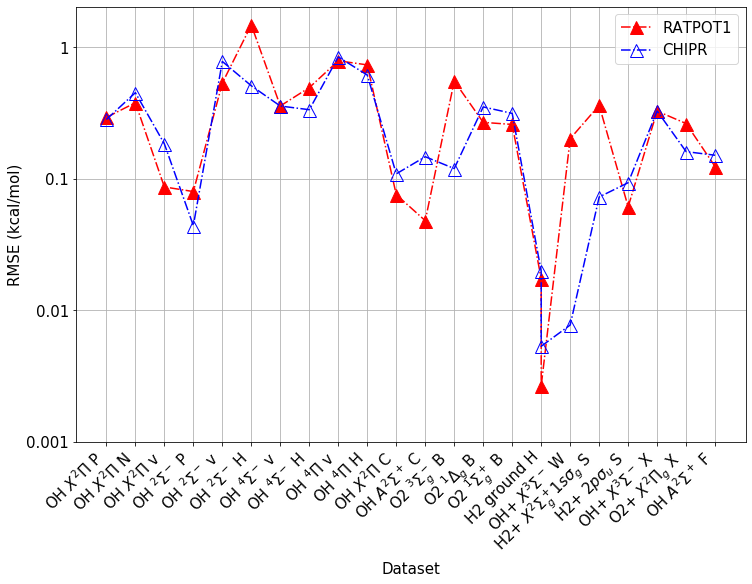

In [38]:
# plot of the table (finding which model is the best)
plt.rcParams.update({'font.size': 15})
#plt.subplots(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))

markersize = 13

x = [data["mol"][i]+" "+data["state"][i]+" "+data["author"][i][0] for i in range(len(data["mol"]))]
y = np.array(data["ansatz_acc"])*627.5
ax.plot(x, np.log10(y), '-.r^', markersize=markersize)
y = np.array(data["chipr_acc"])*627.5
ax.plot(x, np.log10(y), '-.b^', markersize=markersize, fillstyle="none")
plt.xticks(rotation=45, ha="right")

interval = [1, 1e-1, 1e-2, 1e-3]
plt.yticks(np.log10(interval), interval)

plt.xlabel("Dataset"); plt.ylabel("RMSE (kcal/mol)")
plt.legend(["RATPOT1", "CHIPR"])
ax.grid()
plt.show()

### kfold val RATPOT1,2 chipr

In [83]:
#fname = "result/cross_val_each_state_041221_021211.pkl"
fname = "result/cross_val_each_state_5fold_101221_031813.pkl"
with open(fname, 'rb') as handle:
    data = pickle.load(handle)
print(data.keys())
print(len(data["mol"]), len(data["state"]), len(data["author"]))
filter = ['ansatz_1_acc', 'ansatz_2_acc', 'chipr_acc', 'fold'] #joined data filter
display = {k:data[k] for k in filter if k in data} #key filter
display = pd.DataFrame(display) #filter the data
display

dict_keys(['fold', 'num_params', 'degree', 'opt_restart', 'opt_power', 'opt_delta', 'mol', 'state', 'author', 'method', 'Z', 'ansatz_1_acc', 'ansatz_1_C', 'ansatz_2_acc', 'ansatz_2_C', 'chipr_acc', 'chipr_C'])
23 23 23


ansatz_1_acc  ansatz_2_acc  chipr_acc  fold
0        0.003882      0.000452   0.000493     0
1        0.000755      0.000796   0.000615     1
2        0.028596      0.001738   0.051070     2
3        0.001535      0.001403   0.001656     3
4        1.102263      0.098587   0.012123     4
..            ...           ...        ...   ...
110      0.000171      0.000243   0.000198     0
111      0.000428      0.000392   0.000458     1
112      0.001356      0.000698   0.000559     2
113      0.000403      0.000368   0.000534     3
114      0.000173      0.000443   0.000153     4

[115 rows x 4 columns]

In [84]:
def get_fold(fold): #get data's fold
    y_a1 = []; y_a2 = []; y_ch = []
    for i in range(len(data["ansatz_1_acc"])):
        if data["fold"][i] == fold:
            y_a1.append(data["ansatz_1_acc"][i])
            y_a2.append(data["ansatz_2_acc"][i])
            y_ch.append(data["chipr_acc"][i])
    y_a1 = np.array(y_a1); y_a2 = np.array(y_a2); y_ch = np.array(y_ch)
    return y_a1, y_a2, y_ch

In [85]:
## plot per fold routine:
def plot_fold(fold):
    # get the data corr to fold:
    y_a1, y_a2, y_ch = get_fold(fold)
    
    # plot of the table (finding which model is the best):
    plt.rcParams.update({'font.size': 15})
    #plt.subplots(figsize=(12, 8))
    fig, ax = plt.subplots(figsize=(15, 10))

    markersize = 13

    x = [data["mol"][i]+" "+data["state"][i]+" "+data["author"][i][0] for i in range(len(data["mol"]))]
    y_a1 *= 627.5
    ax.plot(x, np.log10(y_a1), '-.r^', markersize=markersize)
    y_a2 *= 627.5
    ax.plot(x, np.log10(y_a2), '--gD', markersize=markersize, fillstyle="none")
    y_ch *= 627.5
    ax.plot(x, np.log10(y_ch), '-.b^', markersize=markersize, fillstyle="none")
    plt.xticks(rotation=45, ha="right")

    interval = [1, 1e-1, 1e-2, 1e-3]
    plt.yticks(np.log10(interval), interval)

    plt.xlabel("Dataset"); plt.ylabel("RMSE (kcal/mol)")
    plt.legend(["RATPOT1", "RATPOT2", "CHIPR"])
    plt.title("Fold-"+str(fold))
    
    ax.grid()
    plt.show()

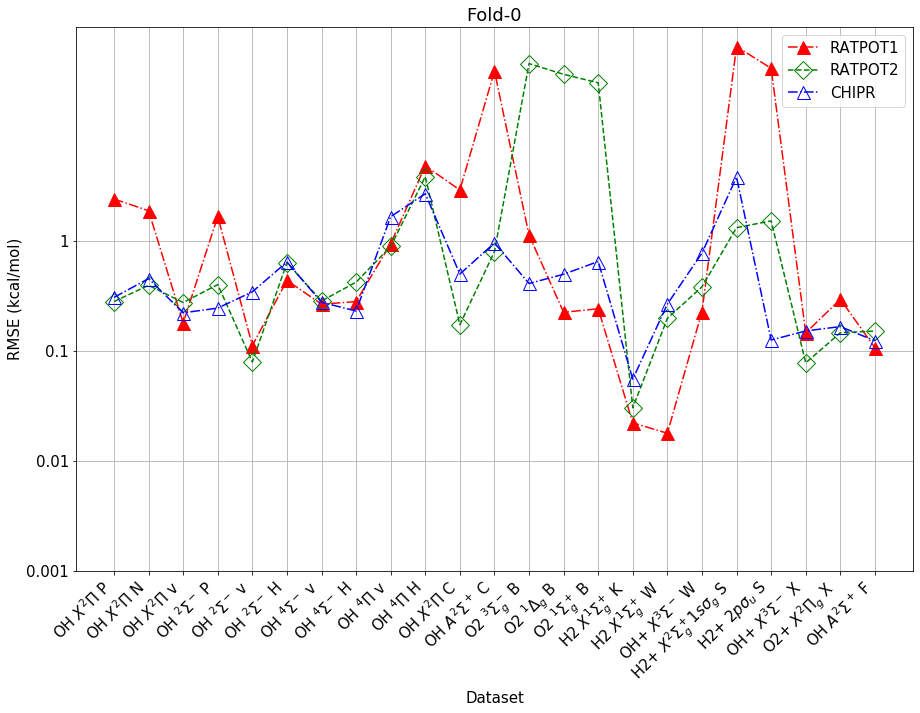

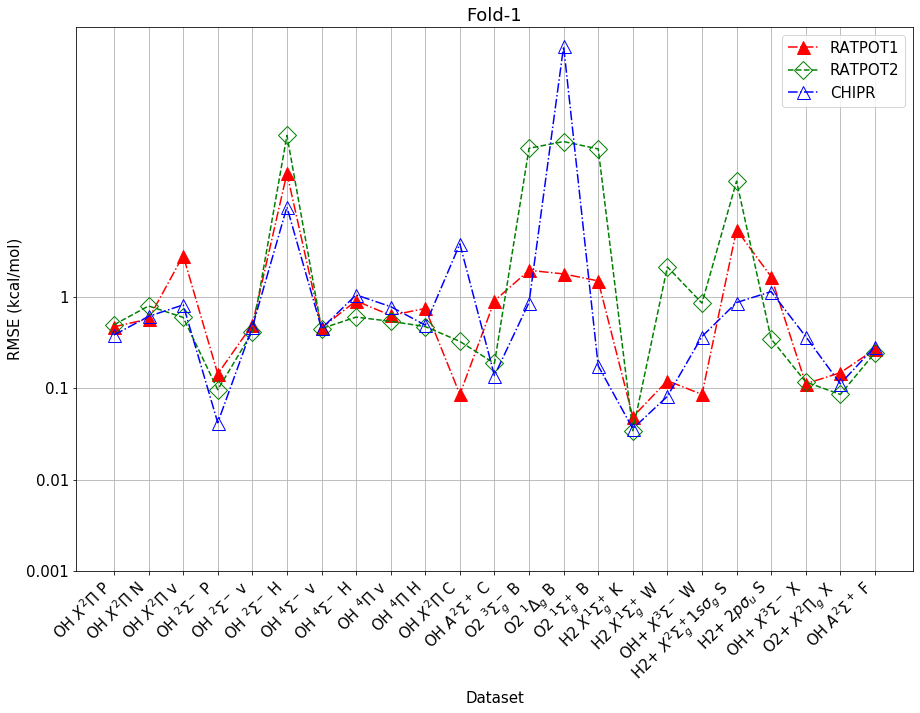

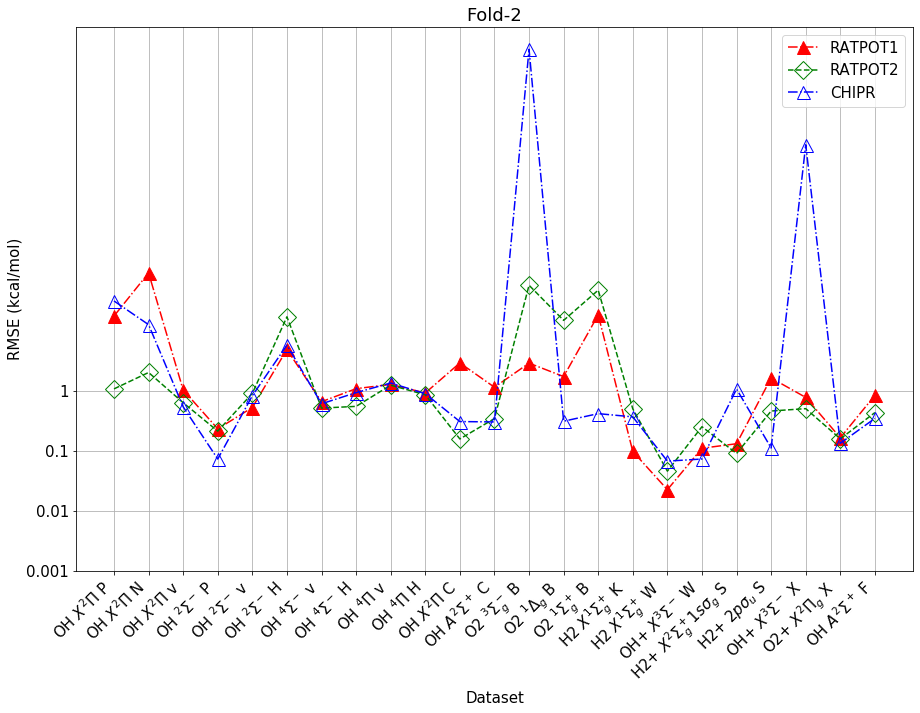

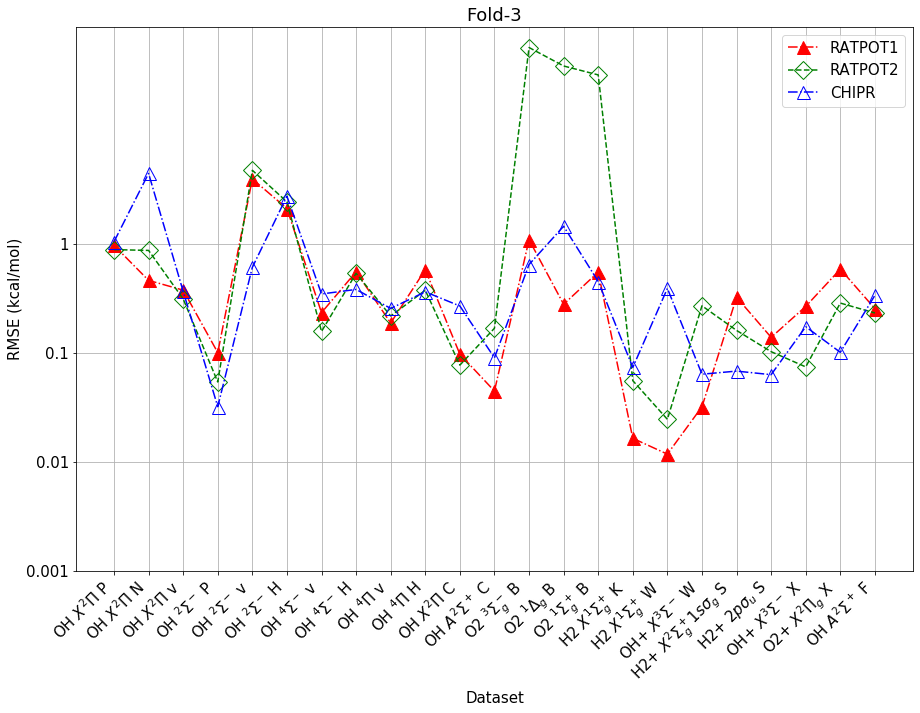

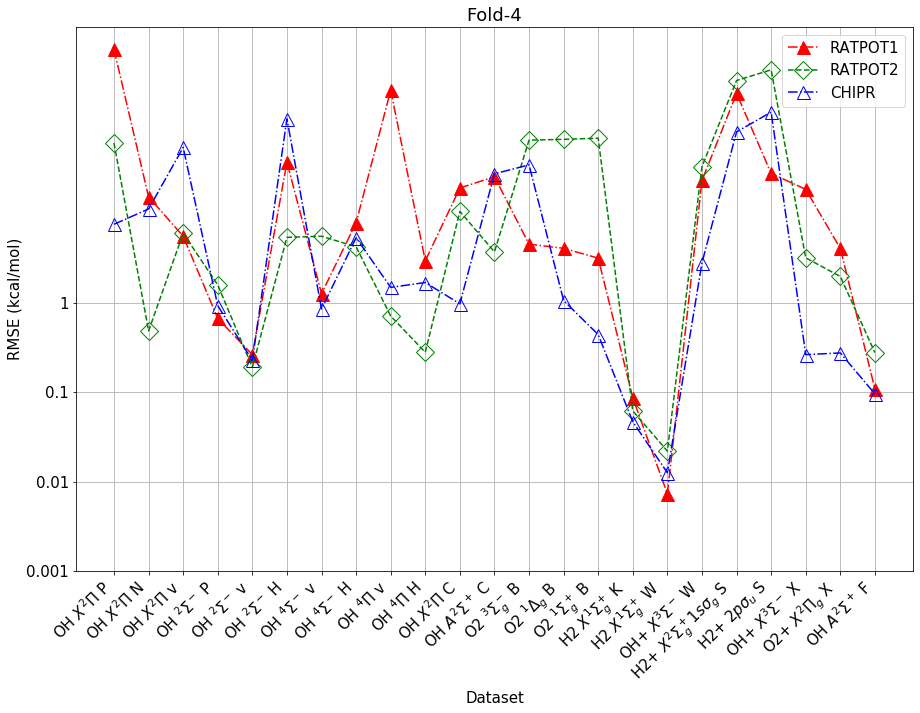

In [13]:
for i in range(5):
    plot_fold(i)

In [138]:
# get the median, min, max of each method on each dataset:
y_a1 = []; y_a2 = []; y_ch = []
for i in range(5):
    a1, a2, ch = get_fold(i)
    y_a1.append(a1); y_a2.append(a2); y_ch.append(ch)
y_a1 = np.array(y_a1); y_a2 = np.array(y_a2); y_ch = np.array(y_ch)

#each element repersents the stats of one dataset:
med_a1 = []; med_a2 = []; med_ch = [] 
min_a1 = []; min_a2 = []; min_ch = []
max_a1 = []; max_a2 = []; max_ch = []
for i in range(y_a1.T.shape[0]):
    med_a1.append(np.median(y_a1.T[i])); med_a2.append(np.median(y_a2.T[i])); med_ch.append(np.median(y_ch.T[i])) #medians
    min_a1.append(np.min(y_a1.T[i])); min_a2.append(np.min(y_a2.T[i])); min_ch.append(np.min(y_ch.T[i])) #mins
    max_a1.append(np.max(y_a1.T[i])); max_a2.append(np.max(y_a2.T[i])); max_ch.append(np.max(y_ch.T[i])) #maxs
med_a1 = np.array(med_a1); med_a2 = np.array(med_a2); med_ch = np.array(med_ch)
min_a1 = np.array(min_a1); min_a2 = np.array(min_a2); min_ch = np.array(min_ch)
max_a1 = np.array(max_a1); max_a2 = np.array(max_a2); max_ch = np.array(max_ch)
    
#medians:
medians = np.array([med_a1, med_a2, med_ch])
mins = np.array([min_a1, min_a2, min_ch])
maxs = np.array([max_a1, max_a2, max_ch])

#get the min of the medians for sorting (get the sorted idx):
min_medians = np.min(medians.T,axis = 1)
sort_idx = np.argsort(min_medians)

#sort:
sortmeds = np.array([med_a1[sort_idx], med_a2[sort_idx], med_ch[sort_idx]])
sortmins = np.array([min_a1[sort_idx], min_a2[sort_idx], min_ch[sort_idx]])
sortmaxs = np.array([max_a1[sort_idx], max_a2[sort_idx], max_ch[sort_idx]])

#log10:
logmeds = np.log10(sortmeds*627.5) #in kcal/mol
logmins = np.log10(sortmins*627.5) #in kcal/mol
logmaxs = np.log10(sortmaxs*627.5) #in kcal/mol

#offsets:
offsets = []
for i in range(3): #a1, a2, ch
    offsets.append([np.abs(logmeds[i] - logmins[i]), np.abs(logmeds[i] - logmaxs[i])])
offsets = np.array(offsets)

min_max_a1 = np.array([np.abs(medians[0] - mins[0])[sort_idx], np.abs(medians[0] - maxs[0])[sort_idx]]) #ansatz1 error bar
min_max_a2 = np.array([np.abs(medians[1] - mins[1])[sort_idx], np.abs(medians[1] - maxs[1])[sort_idx]]) #ansatz2 error bar
min_max_ch = np.array([np.abs(medians[2] - mins[2])[sort_idx], np.abs(medians[2] - maxs[2])[sort_idx]]) #CHIPR error bar

x = np.array([data["mol"][i]+" "+data["state"][i]+" "+data["author"][i][0] for i in range(len(data["mol"]))])
sorted_x = x[sort_idx]

(-3, 4)

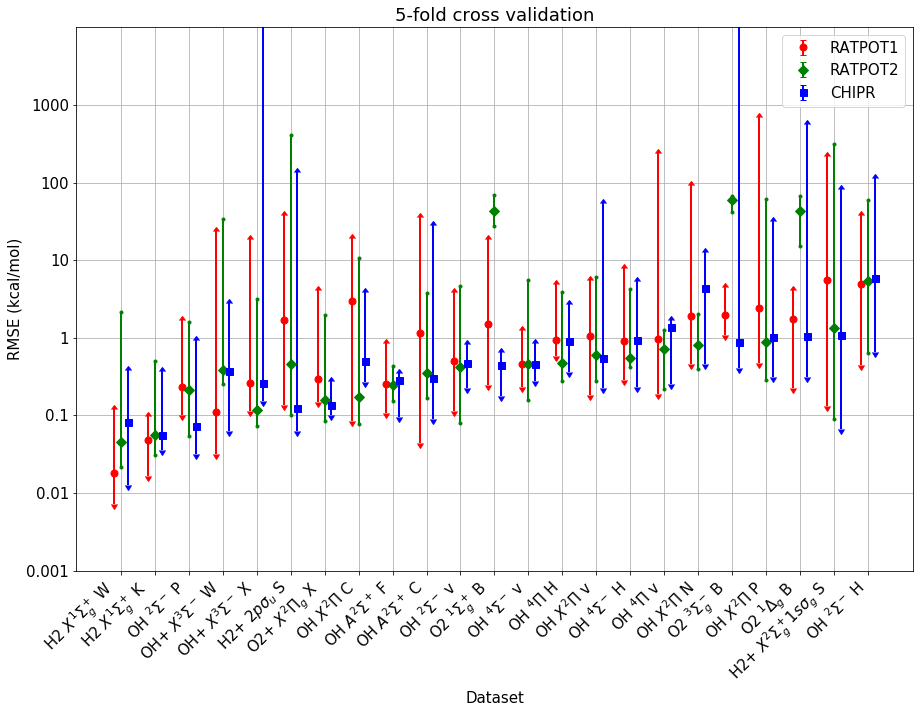

In [169]:
# plot 
plt.rcParams.update({'font.size': 15})
markersize = 13
fig, ax = plt.subplots(figsize=(15, 10))

trans1 = Affine2D().translate(-0.2, 0.0) + ax.transData
trans2 = Affine2D().translate(0.0, 0.0) + ax.transData
trans3 = Affine2D().translate(0.2, 0.0) + ax.transData

#ax.plot(sorted_x, np.log10(medians[0][sort_idx]*627.5), '-.r^', markersize=markersize) #ratpot1
_, caps, _ = ax.errorbar(sorted_x, logmeds[0], yerr=offsets[0], fmt = "ro", ecolor="red", elinewidth = 2, uplims=True, lolims=True, capsize=3, markersize=7, transform = trans1)
#ax.plot(sorted_x, np.log10(medians[0][sort_idx]*627.5))
#ax.plot(sorted_x, maxs[0][sort_idx]*627.5)
#ax.plot(sorted_x, np.log10(medians[1][sort_idx]*627.5), '--gD', markersize=markersize, fillstyle="none") #ratpot2
_, caps2, _ = ax.errorbar(sorted_x, logmeds[1], yerr=offsets[1], fmt = "gD",ecolor="green", elinewidth = 2, uplims=True, lolims=True, capsize=3, markersize=7, transform = trans2)
#ax.plot(sorted_x, np.log10(medians[2][sort_idx]*627.5), '-.bo', markersize=markersize, fillstyle="none") #chipr
_, caps3, _ = ax.errorbar(sorted_x, logmeds[2], yerr=offsets[2], fmt = "bs", ecolor="blue", elinewidth = 2, uplims=True, lolims=True, capsize=3, markersize=7, transform = trans3)
interval = [1000, 100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
plt.yticks(np.log10(interval), interval)
plt.xticks(rotation=45, ha="right")

'''
for cap in caps:
    cap.set_marker("o")
'''
for cap in caps2:
    cap.set_marker(".")
'''
for cap in caps3:
    cap.set_marker("s")
'''

ax.grid()
plt.xlabel("Dataset"); plt.ylabel("RMSE (kcal/mol)")
plt.legend(["RATPOT1", "RATPOT2", "CHIPR"])
plt.title("5-fold cross validation")

plt.ylim(-3, 4)

In [274]:
# eval tables:
fname = "result/cross_val_performance_OH+_11112021.pkl" #contains time eval
fname1 = "result/time_eval_ansatz2_161121_120256.pkl" #contains ansatz2 time
with open(fname, 'rb') as handle:
    data = pickle.load(handle)
with open(fname1, 'rb') as handle:
    data1 = pickle.load(handle)
print(data.keys())
print(data1.keys())

dict_keys(['fold', 'num_params', 'opt_restart', 'opt_power', 'opt_delta', 'chipr_t', 'chipr_acc_train', 'chipr_acc_test', 'chipr_C', 'ansatz_0_t', 'ansatz_0_acc_train', 'ansatz_0_acc_test', 'ansatz_0_C', 'degree', 'simulation_time'])
dict_keys(['F_name', 'num_params', 'degree', 'times'])


### RATPOTx and CHIPR acc only

dict_keys(['test_size', 'num_params', 'opt_restart', 'opt_power', 'opt_delta', 'ansatz_2_acc_train', 'ansatz_2_acc_test', 'ansatz_2_C', 'degree', 'simulation_time'])
[0.020474987703733107, 0.00023236846646669437, 0.0002325350014193759, 0.00023253500141938717, 0.00023253500141938663, 0.00023253500141940173, 0.00023253500141938481, 0.00023253500141939964, 0.00023253500141938915, 0.0002325350014193835, 0.00023253500141939403, 0.00023253500141940232, 0.00023253500141939417, 0.00023253500141940043, 0.0002325350014193918, 0.0002325350014193813, 0.0002325350014193961, 0.0002325350014193948, 0.00023253500141939064, 0.00023253500141939555]


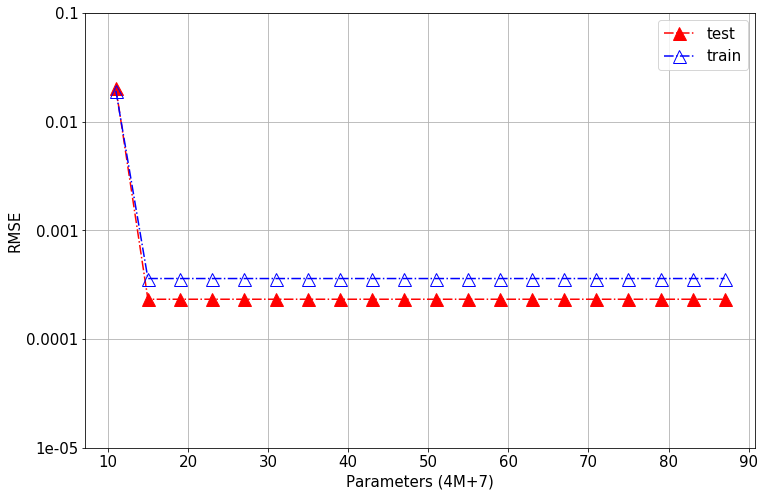

In [10]:
#fname = "result/spec_split_data_fit_OH+_151121_235158.pkl"
fname = "result/spec_split_data_fit_direct_OH+_161121_150347.pkl"
with open(fname, 'rb') as handle:
    data = pickle.load(handle)
print(data.keys())
print(data["ansatz_2_acc_test"])


## plot of the table (finding which model is the best)
plt.rcParams.update({'font.size': 15})
#plt.subplots(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))

markersize = 13

x = data["num_params"]
y = data["ansatz_2_acc_test"]
ax.plot(x, np.log10(y), '-.r^', markersize=markersize)
y = data["ansatz_2_acc_train"]
ax.plot(x, np.log10(y), '-.b^', markersize=markersize, fillstyle="none")
interval = [1e-1,1e-2, 1e-3, 1e-4, 1e-5]
plt.yticks(np.log10(interval), interval)
#plt.xticks(rotation=45, ha="right")


plt.xlabel("Parameters (4M+7)"); plt.ylabel("RMSE")
plt.legend(["test", "train"])
ax.grid()
plt.show()

dict_keys(['method', 'test_size', 'num_params', 'opt_restart', 'opt_power', 'opt_delta', 'ansatz_2_acc_train', 'ansatz_2_acc_test', 'ansatz_2_C', 'degree', 'simulation_time'])
dict_keys(['num_params', 'opt_restart', 'opt_power', 'opt_delta', 'chipr_t', 'chipr_acc_train', 'chipr_acc_test', 'chipr_C', 'ansatz_1_t', 'ansatz_1_acc_train', 'ansatz_1_acc_test', 'ansatz_1_C', 'degree', 'simulation_time'])
dict_keys(['method', 'test_size', 'num_params', 'opt_restart', 'opt_power', 'opt_delta', 'ansatz_3_acc_train', 'ansatz_3_acc_test', 'ansatz_3_C', 'degree', 'simulation_time'])
dict_keys(['method', 'test_size', 'num_params', 'opt_restart', 'opt_power', 'opt_delta', 'ansatz_3_acc_train', 'ansatz_3_acc_test', 'ansatz_3_C', 'degree', 'simulation_time'])
[11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55, 59, 63, 67, 71, 75, 79, 83, 87] [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88] [12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 8

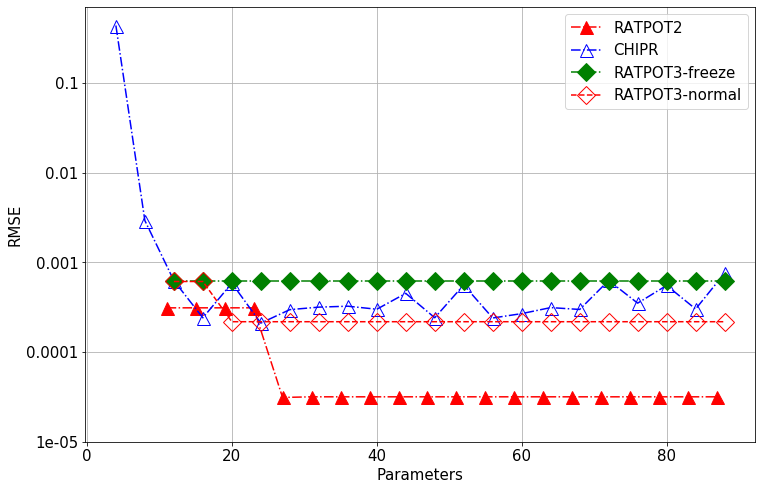

In [18]:
#fname = "result/spec_split_data_fit_OH+_161121_005103.pkl"
fname = "result/spec_split_data_fit_multirestart_OH+_161121_211534.pkl"
with open(fname, 'rb') as handle:
    data = pickle.load(handle)
print(data.keys())

#fname1 = "result/cross_val_performance_OH+_11112021.pkl"
fname1 = "result/split_data_fit_OH+171121_121942.pkl"
with open(fname1, 'rb') as handle:
    data1 = pickle.load(handle)
print(data1.keys())


fname2 = "result/spec_split_data_fit_multirestart_ansatz_3_freeze_OH+_241121_173555.pkl"
with open(fname2, 'rb') as handle:
    data2 = pickle.load(handle)
print(data2.keys())

fname3 = "result/spec_split_data_fit_multirestart_ansatz_3_normal_OH+_241121_184742.pkl"
with open(fname3, 'rb') as handle:
    data3 = pickle.load(handle)
print(data3.keys())

print(data["num_params"], data1["num_params"], data2["num_params"], data3["num_params"])
print(data["ansatz_2_acc_test"])


## plot of the table (finding which model is the best)
plt.rcParams.update({'font.size': 15})
#plt.subplots(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))

markersize = 13

x = data["num_params"]
y = data["ansatz_2_acc_test"]
ax.plot(x, np.log10(y), '-.r^', markersize=markersize)
x = data1["num_params"]
y = data1["chipr_acc_test"]
ax.plot(x, np.log10(y), '-.b^', markersize=markersize, fillstyle="none")
x = data2["num_params"]
y = data2["ansatz_3_acc_test"]
ax.plot(x, np.log10(y), '-.gD', markersize=markersize)
x = data3["num_params"]
y = data3["ansatz_3_acc_test"]
ax.plot(x, np.log10(y), '--rD', markersize=markersize, fillstyle="none")
interval = [1e-1,1e-2, 1e-3, 1e-4, 1e-5]
plt.yticks(np.log10(interval), interval)
#plt.xticks(rotation=45, ha="right")

plt.xlabel("Parameters"); plt.ylabel("RMSE")
plt.legend(["RATPOT2", "CHIPR", "RATPOT3-freeze", "RATPOT3-normal"])
ax.grid()
plt.show()

In [40]:
fname = "result/spec_split_data_fit_multirestart_OH+_161121_211534.pkl" #contains ansatz2 acc
with open(fname, 'rb') as handle:
    data = pickle.load(handle)
print(data.keys())

fname1 = "result/split_data_fit_OH+171121_121942.pkl" #contains chipr acc
with open(fname1, 'rb') as handle:
    data1 = pickle.load(handle)
print(data1.keys())

print(data["num_params"], data1["num_params"])
'''
data["ansatz_0_t"] = data0["ansatz_t"]; data["chipr_t"] = data0["chipr_t"]; data["eval_loop"]=data0["eval_loop"]; data["eval_run"]=data0["eval_run"] #join time eval
filter = ['num_params', 'ansatz_0_acc_test', 'chipr_acc_test', "ansatz_0_t", "chipr_t"] #joined data filter
display = {k:data[k] for k in filter if k in data} #key filter
display = pd.DataFrame(display) #filter the data
display
'''


dict_keys(['method', 'test_size', 'num_params', 'opt_restart', 'opt_power', 'opt_delta', 'ansatz_2_acc_train', 'ansatz_2_acc_test', 'ansatz_2_C', 'degree', 'simulation_time'])
dict_keys(['num_params', 'opt_restart', 'opt_power', 'opt_delta', 'chipr_t', 'chipr_acc_train', 'chipr_acc_test', 'chipr_C', 'ansatz_1_t', 'ansatz_1_acc_train', 'ansatz_1_acc_test', 'ansatz_1_C', 'degree', 'simulation_time'])
[11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55, 59, 63, 67, 71, 75, 79, 83, 87] [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88]


'\ndata["ansatz_0_t"] = data0["ansatz_t"]; data["chipr_t"] = data0["chipr_t"]; data["eval_loop"]=data0["eval_loop"]; data["eval_run"]=data0["eval_run"] #join time eval\nfilter = [\'num_params\', \'ansatz_0_acc_test\', \'chipr_acc_test\', "ansatz_0_t", "chipr_t"] #joined data filter\ndisplay = {k:data[k] for k in filter if k in data} #key filter\ndisplay = pd.DataFrame(display) #filter the data\ndisplay\n'

In [ ]:
## plot of the table (finding which model is the best)
plt.rcParams.update({'font.size': 15})
#plt.subplots(figsize=(12, 8))
fig, ax = plt.subplots(figsize=(12, 8))

markersize = 13

numparams = [str(param) for param in data["num_params"]]

x = data["ansatz_0_t"]; y = np.log10(np.array(data["ansatz_0_acc_test"])*627.5) #scale y to kcal/mol
ax.plot(x, y, '-.r^', markersize=markersize)
for i, xy in enumerate(np.array(list(zip(x, y)))):
    ax.annotate(numparams[i], xy=xy+0.01, textcoords='data')
x = data["chipr_t"]; y = np.log10(np.array(data["chipr_acc_test"])*627.5) #scale y to kcal/mol
ax.plot(x, y, '--b^', markersize=markersize, fillstyle="none")
for i, xy in enumerate(np.array(list(zip(x, y)))):
    ax.annotate(numparams[i], xy=xy+0.01, textcoords='data')

interval = [1, 5e-1, 1e-1, 5e-2, 1e-2]
plt.yticks(np.log10(interval), interval)

plt.xlabel("time (s)"); plt.ylabel("RMSE (kcal/mol)")
plt.legend(["ansatz", "CHIPR"])

ax.grid()
plt.show()
print("==== Optimization stats ====")
#print("data: ", list_data[qidxes[0]]["mol"], list_data[qidxes[0]]["state"], list_data[qidxes[0]]["author"], len(R),"data points")
print("optimization restarts = ",data["opt_restart"])
print("optimization power = ", data["opt_power"])
print("delta threshold = ", data["opt_delta"])
print("evaluation loops = ",data["eval_loop"][0])
print("evaluation runs = ",data["eval_run"][0])
print("elapsed time = ", data["simulation_time"], "s")

In [41]:
#see residual here, using prev coeffs:
fname = "result/cross_val_performance_OH+_11112021.pkl" #contains time eval
with open(fname, 'rb') as handle:
    data = pickle.load(handle)
print(data["simulation_time"])

15895.41940832138


### Conical Intersection

<IPython.core.display.Javascript object>


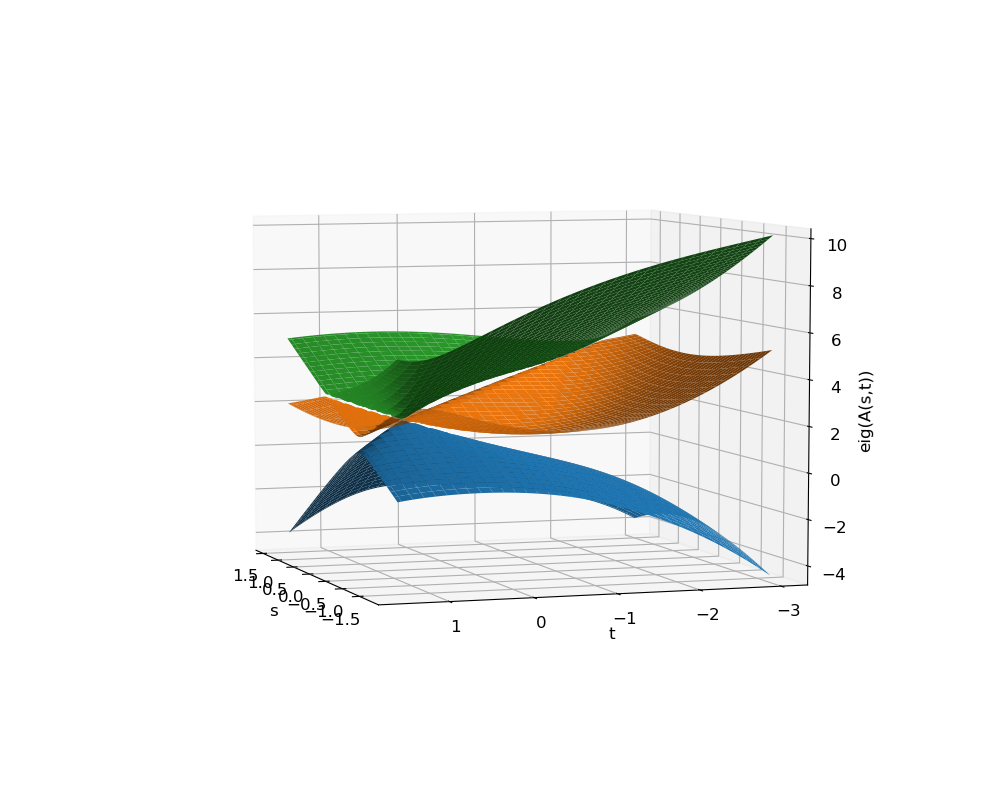

Text(0.5, 0, 'eig(A(s,t))')

In [51]:
%matplotlib notebook

from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
#s = t = np.linspace(-2.01, 2.01, 101)
#s = np.linspace(1.95, 2.05, 101)
#t = np.linspace(-1.05, -.95, 101)

s_grid = np.linspace(-1.8, 1.5, 101)
t_grid = np.linspace(-3., 1.5, 101)
sv, tv = np.meshgrid(s_grid, t_grid)

# (s,t) = (2,−1) conical intersection
A = lambda s,t: np.array([
        [(t), (2*t + s), (t+1)],
        [(2*t + s), (2*t), (t+1)],
        [(t+1), (t+1), (t+1-s)]
    ])

'''
3-s    x     y

x     s-t     z

y      z     3-s
# x, y z in {0, s+t, -s-t, s^2-1, 1-s^2, st -1, 1-st, t^2-1, 1-t^2}
# (9*8*7 possibilities) have two CIs at (s,t)=(1,-1) and (-1,1).
'''
B = lambda s,t,x,y,z: np.array([
        [3-s, x, y],
        [x, s-t, z],
        [y, z, 3-s]
])
    
def con_3_sheet(A, s,t,i0,i1,i2): #the z coordinate, which is the eigenvalue, three sheeted surface
    #A = symm matrix
    st_set = [0, s+t, -s-t, s**2-1, 1-s**2, s*t-1, 1-s*t, t**2-1, 1-t**2]
    x = st_set[i0]; y = st_set[i1]; z = st_set[i2]
    w, _ = LA.eig(A(s,t,x,y,z))
    w = np.sort(w)
    return w

#generate z:
z = np.zeros((len(s_grid)*len(t_grid),3))
i = 0
for si in s_grid:
    for ti in t_grid:
        #z[i] = con_3_sheet(A, si, ti)
        z[i] = con_3_sheet(B, si, ti, 1, 2, 3)
        #print(z[i])
        i+=1
        
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(sv, tv, z.T[0].reshape(sv.shape))
ax.plot_surface(sv, tv, z.T[1].reshape(sv.shape))
ax.plot_surface(sv, tv, z.T[2].reshape(sv.shape))

ax.set_xlabel('s')
ax.set_ylabel('t')
ax.set_zlabel('eig(A(s,t))')

<IPython.core.display.Javascript object>


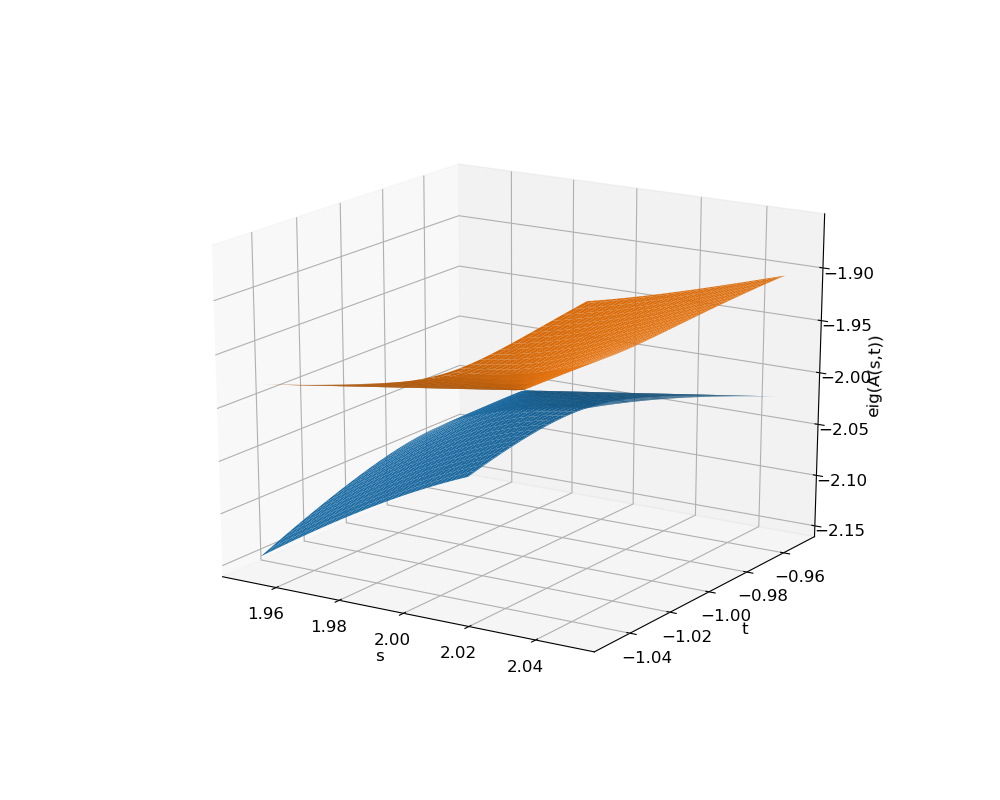

Text(0.5, 0, 'eig(A(s,t))')

In [57]:
s_grid = np.linspace(1.95, 2.05, 101)
t_grid = np.linspace(-1.05, -.95, 101)

sv, tv = np.meshgrid(s_grid, t_grid)

# (s,t) = (2,−1) conical intersection
A = lambda s,t: np.array([
        [(t), (2*t + s), (t+1)],
        [(2*t + s), (2*t), (t+1)],
        [(t+1), (t+1), (t+1-s)]
    ])

def con_2_sheet(A, s,t): #the z coordinate, which is the eigenvalue, three sheeted surface
    #A = symm matrix
    w, _ = LA.eig(A(s,t))
    w = np.sort(w)
    return w

#generate z:
z = np.zeros((len(s_grid)*len(t_grid),3))
i = 0
for si in s_grid:
    for ti in t_grid:
        z[i] = con_2_sheet(A, si, ti)
        #print(z[i])
        i+=1
        
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(sv, tv, z.T[0].reshape(sv.shape))
ax.plot_surface(sv, tv, z.T[1].reshape(sv.shape))
#ax.plot_surface(sv, tv, z.T[2].reshape(sv.shape))

ax.set_xlabel('s')
ax.set_ylabel('t')
ax.set_zlabel('eig(A(s,t))')

### Functions:

In [45]:
import numpy as np, pickle

# RATPOT3:
def f_diatomic_ansatz_3(C, *args):
    '''RATPOT3: with coulomb term, total of 4M+8 parameters'''
    R = args[0]
    Z = args[1]
    M = args[2] #degree of pol
    
    #coefficients:
    a = C[: M]
    b = C[M : 2*M]
    c = C[2*M : 3*M+4]
    d = C[3*M+4 : 4*M+7]
    R0 = C[-1] #or C[4M+7]
    
    P = Z*(1/R - 1/R0)
    for i in range(M): #0,1,..M-1 (M length)
        P *= (1 - R/a[i])**2 + R/b[i]
    
    Q = 1
    for i in range(M+3): #0,1,..M+2 (M+3 length)
        Q *= (1 - R/c[i])**2 + R/d[i]
    
    V = c[-1] + (P/Q)
    return V

# the RMSE:
def RMSE(Y_pred, Y):
    error = 0
    n = len(Y)
    for i in range(n):
        diff = (Y[i]-Y_pred[i])**2
        error += diff
    return np.sqrt(error/n)


### additional helper functions:
def f_diatomic_ansatz_3_verbose(C, *args):
    '''RATPOT3: with coulomb term, total of 4M+8 parameters'''
    R = args[0]
    Z = args[1]
    M = args[2] #degree of pol
    
    #coefficients:
    a = C[: M]
    b = C[M : 2*M]
    c = C[2*M : 3*M+4]
    d = C[3*M+4 : 4*M+7]
    R0 = C[-1] #or C[4M+7]
    
    print("a =")
    print(np.array2string(a, separator=", "))
    print("b =")
    print(np.array2string(b, separator=", "))
    print("c =")
    print(np.array2string(c[:-1], separator=", "))
    print("d =")
    print(np.array2string(d, separator=", "))
    print("R0 = ",R0)
    print("c0 =", c[-1])

def f_diatomic_ansatz_3_append(C, *args):
    '''RATPOT3: with coulomb term, total of 4M+8 parameters'''
    R = args[0]
    Z = args[1]
    M = args[2] #degree of pol
    
    #coefficients:
    a = C[: M]
    b = C[M : 2*M]
    c = C[2*M : 3*M+4]
    d = C[3*M+4 : 4*M+7]
    R0 = C[-1]
    
    a = np.hstack((a, 1e-10))
    b = np.hstack((b, 1e-10))

    c0 = c[-1]
    c = c[:len(c)-1]
    c = np.hstack((c, 1e-10))
    d = np.hstack((d, 1e-10))
    
    print("a =")
    print(np.array2string(a, separator=", "))
    print("b =")
    print(np.array2string(b, separator=", "))
    print("c =")
    print(np.array2string(c, separator=", "))
    print("d =")
    print(np.array2string(d, separator=", "))
    print("R0 = ",R0)
    print("c0 =", c0)
    
    return a, b, c, d, R0, c0

### Datasets:

In [46]:
R_train = [ 3.02356158,  1.93696914,  5.66917797,  1.41729449,  2.17318489,  1.70075339,
 15.11780791,  6.61404096,  4.72431497,  1.03934929, 18.89725989,  1.51178079,
  1.32280819,  2.26767119, 11.33835593,  2.64561638,  1.74799654,  1.60626709,
  8.50376695,  1.22832189,  0.94486299,  3.40150678,  2.03145544,  1.88972599]
V_train = [0.37953023, 0.31060023, 0.48699363, 0.41039383, 0.31762823, 0.32470223,
 0.50039399, 0.4963278,  0.46398523, 0.87267523, 0.50042037, 0.36884623,
 0.47182183, 0.32323923, 0.500293,   0.35120723, 0.31918723, 0.34161123,
 0.49988219, 0.56098753, 1.13576423, 0.40429143, 0.31180123, 0.31113823]
R_test = [1.84248284, 3.77945198, 1.79523969, 1.13383559, 2.07869859, 1.98421229,
 9.44862994, 7.55890395]
V_test = [0.31262723, 0.42511133, 0.31524223, 0.68914423, 0.31330223, 0.31086423,
 0.50016526, 0.49909276]
Z = 8 # for OH+

R_train = np.array(R_train); V_train = np.array(V_train); R_test = np.array(R_test); V_test = np.array(V_test)

In [47]:
fname = "result/spec_split_data_fit_multirestart_ansatz_3_OH+_091221_221601.pkl"
with open(fname, 'rb') as handle:
    data = pickle.load(handle)
print(data.keys())

dict_keys(['method', 'test_size', 'num_params', 'opt_restart', 'opt_power', 'opt_delta', 'ansatz_3_acc_train', 'ansatz_3_acc_test', 'ansatz_3_C', 'degree', 'simulation_time'])


### Coefficients:

In [48]:
idx = 2 # index which contains lowest RMSE of ratpot 3
C = data["ansatz_3_C"][idx]
print("x_0 : ")
a,b,c,d,R0,c0 = f_diatomic_ansatz_3_append(C, R_test, Z, 3) #add 0 to the end of each vector
x0 = np.hstack((a,b,c,c0,d,R0))
x1 = data["ansatz_3_C"][idx + 1]
print("x_1 : ")
f_diatomic_ansatz_3_verbose(x1, R_test, Z, 4)

x_0 : 
a =
[8.42488856e+00, 1.03378235e+01, 8.57410902e+00, 1.00000000e-10]
b =
[2.03105767e+01, 2.02988135e+01, 7.81355347e+00, 1.00000000e-10]
c =
[5.10635682e+00, 5.50098803e+00, 9.27448161e-01, 3.69225144e+01,
 2.13326493e+00, 8.55463054e+00, 1.00000000e-10]
d =
[6.29055604e+00, 3.84835965e+01, 2.82580835e-01, 1.05583926e+01,
 9.67185941e-01, 7.78788326e+00, 1.00000000e-10]
R0 =  1.288657795471638
c0 = 0.5003497391659774
x_1 : 
a =
[10.89383864, 20.70718947, 12.32490152,  9.86149443]
b =
[12.82492682, 10.93123525, 17.53233086, 18.2503469 ]
c =
[-1.43787482,  1.57101392,  5.59423743,  9.80118719,  6.39850069,
  8.81269181, 14.71187763]
d =
[ 7.90663841,  0.68788538, 31.30265194,  6.36758195,  7.26139142,
  6.36233416,  6.32452362]
R0 =  1.2886215686172167
c0 = 0.5003760348724515


In [49]:
V_pred = f_diatomic_ansatz_3(x0, R_test, Z, 4) # RMSE of x_0
print("RMSE x_0 = ",RMSE(V_pred, V_test))

V_pred = f_diatomic_ansatz_3(x1, R_test, Z, 4) # RMSE of x_0
print("RMSE x_1 = ",RMSE(V_pred, V_test))

RMSE x_0 =  2.7180086838994177e-05
RMSE x_1 =  7.444474321125877e-05


### Line search:

In [78]:
s = np.linspace(-5., 5., 100001)
print(s)
diff = x1 - x0
x = np.array([x0 + s[i]*diff for i in range(len(s))]) # x = x0 + s*(x1-x0)
#print(x0,x[0], x1)
V_preds = np.array([f_diatomic_ansatz_3(x[i], R_test, Z, 4) for i in range(len(x))])
RMSEs = np.array([RMSE(V_preds[i], V_test) for i in range(len(V_preds))])
#print(RMSEs)

[-5.     -4.9999 -4.9998 ...  4.9998  4.9999  5.    ]


(-1, 2.5)

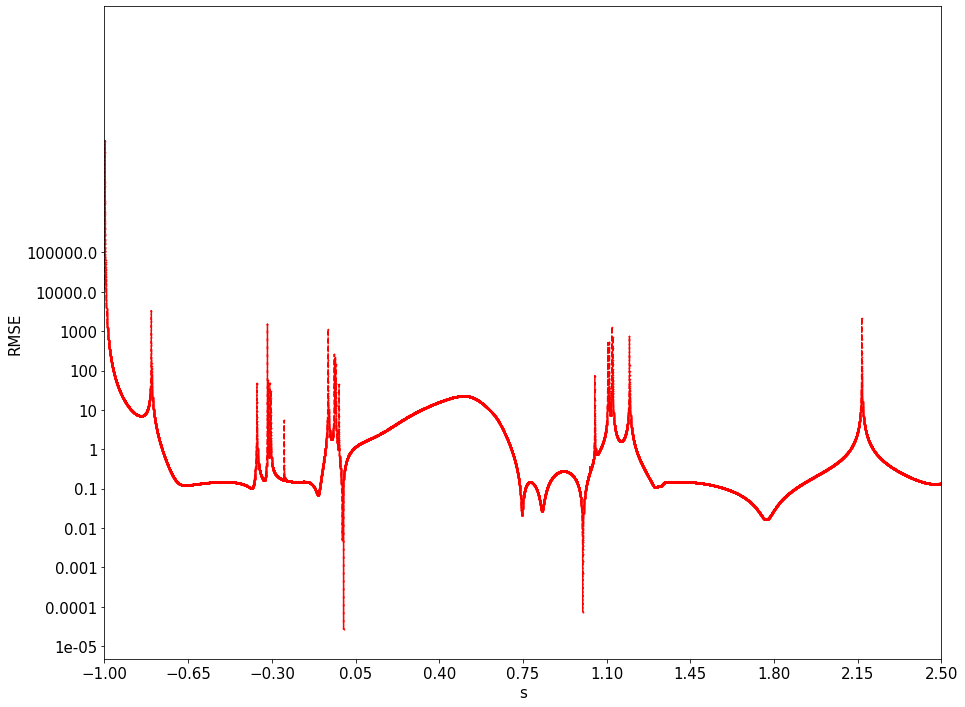

In [79]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(15, 12))

markersize = 1
ax.plot(s, np.log10(RMSEs), '--r^', markersize=markersize)

plt.xlabel("s")
interval = [1e5, 1e4, 1000, 100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
plt.yticks(np.log10(interval), interval)
plt.xticks(np.linspace(-1,2.5,11))
plt.ylabel("RMSE")

#plt.ylim(0, 0.5) #the plot displays y = [0, 2]
plt.xlim(-1, 2.5)